<a href="https://colab.research.google.com/github/donggun112/ABCD-A/blob/20250606/epochs_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 초기 환경 설정

In [1]:
# YOLOv8 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# 파일 선택기를 통한 업로드
uploaded = files.upload()

Saving runs_backup (2).zip to runs_backup (2).zip


In [6]:
# 코랩 셀에서 ! 를 앞에 붙여서 실행
!mkdir -p /content/dataset
!unzip "runs_backup (2).zip" -d /content/dataset

Archive:  runs_backup (2).zip
   creating: /content/dataset/detect/
   creating: /content/dataset/train/yolov8_label_custom/
   creating: /content/dataset/train/yolov8_label_custom2/
   creating: /content/dataset/train/yolov8_label_custom3/
   creating: /content/dataset/train/yolov8_label_custom4/
   creating: /content/dataset/train/yolov8_label_custom5/
   creating: /content/dataset/train/yolov8_label_custom5/weights/
  inflating: /content/dataset/train/yolov8_label_custom5/train_batch1.jpg  
  inflating: /content/dataset/train/yolov8_label_custom5/results.csv  
  inflating: /content/dataset/train/yolov8_label_custom5/R_curve.png  
  inflating: /content/dataset/train/yolov8_label_custom5/val_batch1_pred.jpg  
  inflating: /content/dataset/train/yolov8_label_custom5/labels.jpg  
  inflating: /content/dataset/train/yolov8_label_custom5/train_batch11882.jpg  
  inflating: /content/dataset/train/yolov8_label_custom5/val_batch0_labels.jpg  
  inflating: /content/dataset/train/yolov8_label_

다음 폴더 구조를 수정합니다.


content/

├── dataset
│   ├──train
│   │   ├──images
│   │   ├──labels
│   ├──valid
│   │   ├──images
│   ├──test
│   │   ├──images
└── data.yaml





In [7]:
#test/images 폴더 생성
!mkdir -p /content/dataset/test/images
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [8]:
#valid/images 폴더 생성
!mkdir -p /content/dataset/valid/images
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [9]:
#valid/labels 폴더 생성
!mkdir -p /content/dataset/valid/labels
!cp /content/dataset/train/labels/* /content/dataset/valid/labels/

#data.yaml 파일 수정

train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

In [15]:
# 학습 시작
from ultralytics import YOLO

# Label 모델로 학습
model = YOLO("yolov8l.pt")  # 크기에 따라서 x,s,m,l 등 모델 사용  yolov8s.pt, yolov8m.pt 등

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=2000,
    imgsz=640,
    batch=54,
    name='yolov8_label_custom',
    project='/content/dataset/train',
    patience=0,
    save=True,
    device=0,
)

Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=54, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_label_custom11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, plots=Tru

train: Scanning /content/dataset/train/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100%|██████████| 426/426 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 578.5±490.3 MB/s, size: 56.2 KB)


val: Scanning /content/dataset/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100%|██████████| 426/426 [00:00<?, ?it/s]


Plotting labels to /content/dataset/train/yolov8_label_custom11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.000421875), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/dataset/train/yolov8_label_custom11
Starting training for 2000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/2000      38.6G     0.8764      6.018      1.212         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        426        428   4.43e-05      0.039   3.63e-05   3.15e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/2000      31.8G     0.5586      4.435     0.9744         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        426        428      0.588      0.673      0.614      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/2000      31.9G       0.32       1.88     0.8513         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        426        428      0.827      0.926      0.924      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/2000      31.9G     0.2947      1.067      0.829         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        426        428      0.984      0.995      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/2000      31.9G     0.3168     0.7809     0.8178         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.994      0.995      0.992      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/2000      31.9G     0.3284     0.6447     0.8249         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/2000      31.9G     0.3554     0.5876     0.8385         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428       0.98      0.993      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/2000      31.9G     0.3773     0.5866     0.8446         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.983      0.995      0.991      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/2000      31.9G     0.3972      0.525     0.8597         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428       0.91      0.936      0.978        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/2000      31.9G     0.4381     0.5278     0.8497         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428       0.97      0.969      0.988      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/2000      31.6G     0.4435     0.5456     0.8748         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.888      0.931      0.948      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/2000      31.9G      0.448       0.59      0.865         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.569      0.321      0.363      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/2000      31.9G     0.4568     0.6625     0.8914         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.697       0.59      0.526      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/2000      31.9G     0.4732     0.6047     0.8845         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.704      0.756      0.782      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/2000      31.9G     0.4692     0.5965     0.8857         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        426        428      0.702      0.708      0.778      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/2000      31.9G     0.4835     0.5274     0.8863         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.561      0.814      0.813      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/2000      31.9G      0.496      0.507     0.8893         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428       0.74      0.776      0.929      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/2000      31.9G     0.4885     0.4959     0.8848         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.748       0.97      0.983      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/2000      31.9G     0.4843     0.4682     0.8854         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.782      0.822      0.922      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/2000      31.9G     0.4497     0.4496     0.8914         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.645      0.729      0.733      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/2000      31.9G     0.4744     0.4681     0.8918         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.749      0.726      0.747      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/2000      31.9G     0.4697     0.4717     0.8824         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.725       0.68       0.84      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/2000      31.9G     0.4748     0.4396     0.8959         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.887      0.926       0.97      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/2000      31.9G     0.4787     0.4515     0.8938         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.849      0.938      0.954      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/2000      31.9G     0.4476     0.4172     0.8833         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.802      0.817      0.933      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/2000      31.9G     0.4461     0.4316      0.877         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.829      0.733      0.823      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/2000      31.9G     0.4373     0.4119     0.8699         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.844      0.807      0.923      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/2000      31.9G     0.4426     0.4102     0.8759         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428       0.81      0.852      0.911      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/2000      31.9G     0.4529     0.4118     0.9038         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428       0.93      0.954      0.991      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/2000      31.9G     0.4277     0.4004     0.8796         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428       0.92      0.776      0.869      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/2000      31.9G     0.4217     0.3809     0.8744         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.834      0.668      0.797      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/2000      31.6G     0.4294     0.3825     0.8716         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.859      0.819      0.945      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/2000      31.9G     0.4182     0.3667     0.8728         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.879      0.746      0.824      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/2000      31.9G       0.45      0.374       0.88         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.682      0.755      0.804      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/2000      31.9G     0.4123     0.3464     0.8732         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.887      0.776      0.892       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/2000      31.9G     0.4163     0.3594     0.8739         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.825      0.713      0.842      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/2000      31.9G     0.4088     0.3625     0.8726         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.836      0.954      0.973      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/2000      31.6G     0.4079     0.3477     0.8647         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.849      0.916      0.965      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/2000      31.9G     0.4118     0.3467     0.8736         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.946      0.956      0.978      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/2000      31.9G     0.4024     0.3809      0.865         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.871      0.944      0.983       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/2000      31.9G     0.4064     0.3523     0.8776         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.685      0.761      0.729      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/2000      31.9G     0.4092     0.3543      0.871         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.843      0.804      0.849      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/2000      31.6G     0.4041     0.3563     0.8745         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428       0.72      0.861      0.912      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/2000      31.9G     0.3885     0.3404     0.8622         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.878      0.938       0.93       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/2000      31.9G     0.3876     0.3486     0.8692         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.824       0.95      0.926      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/2000      31.9G     0.3935     0.3329     0.8714         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.925      0.986      0.987       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/2000      31.9G     0.3844     0.3307     0.8669         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.933      0.887       0.95        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/2000      31.9G     0.3804     0.3102     0.8597         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.994      0.993      0.993      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/2000      31.9G     0.3824     0.3303      0.866         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/2000      31.9G     0.3851      0.359     0.8639         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.965      0.962      0.991      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/2000      31.9G     0.3614      0.328     0.8563         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.853      0.908      0.949      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/2000      31.9G     0.3806     0.3268     0.8578         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.946      0.946      0.991      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/2000      31.6G     0.3815     0.3239     0.8509         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.989      0.988      0.992      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/2000      31.9G     0.3808     0.3157     0.8506         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.984      0.995      0.991      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/2000      31.9G     0.3728     0.3227     0.8579         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.975      0.989      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/2000      31.9G     0.3853     0.3096     0.8634         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.967      0.978      0.992      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/2000      31.6G     0.3708     0.3096     0.8538         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.965      0.973      0.991       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/2000      31.9G     0.3727      0.325     0.8504         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428        0.9      0.913      0.984      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/2000      31.9G     0.3724      0.314     0.8646         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.994      0.995      0.993      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/2000      31.9G     0.3727      0.303     0.8686         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.962      0.959      0.981      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/2000      31.9G     0.3635     0.3129     0.8523         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.953      0.869      0.978      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/2000      31.6G     0.3691     0.3037     0.8439         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.975      0.951      0.984      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/2000      31.9G     0.3561     0.2973     0.8498         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.995      0.995      0.992      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/2000      31.9G     0.3603      0.308     0.8628         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.973      0.973      0.991      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/2000      31.9G     0.3655     0.2973     0.8568         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.985      0.982      0.991      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/2000      31.9G     0.3564     0.2975     0.8496         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.934      0.956      0.988      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/2000      31.9G      0.361     0.3039     0.8528         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428       0.99      0.991      0.993      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/2000      31.9G     0.3533     0.2946      0.845         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.987      0.953      0.985      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/2000      31.9G     0.3603     0.2894     0.8578         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.966      0.966      0.989      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/2000      31.9G     0.3442     0.2926     0.8566         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.846       0.85      0.868      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/2000      31.6G     0.3497     0.2944     0.8474         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.935       0.95      0.991      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/2000      31.9G     0.3579     0.3014     0.8648         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.982      0.987      0.992      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/2000      31.9G     0.3446      0.285     0.8489         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.995      0.995      0.991      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/2000      31.9G     0.3415      0.289      0.847         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.992      0.995      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/2000      31.9G     0.3629     0.2998      0.854         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.996      0.993      0.993      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/2000      31.9G     0.3451     0.2938     0.8509         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/2000      31.9G     0.3427     0.2866     0.8521         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.992      0.995      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/2000      31.6G     0.3479     0.2832     0.8523         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/2000      31.9G     0.3317     0.2808     0.8457         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/2000      31.9G     0.3312     0.2654     0.8374         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.995      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/2000      31.9G     0.3472     0.2713     0.8651         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.969      0.937      0.989      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/2000      31.9G     0.3492     0.2735     0.8584         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.906      0.823      0.967      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/2000      31.9G      0.334     0.2725      0.847         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.987      0.995      0.992       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/2000      31.9G     0.3272     0.2727     0.8527         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.992      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/2000      31.9G     0.3321     0.2628     0.8521         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.996      0.995      0.993      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/2000      31.9G     0.3422     0.2682     0.8469         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/2000      31.9G     0.3151     0.2593     0.8466         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.993      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/2000      31.9G     0.3329     0.2681     0.8429         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.993      0.995      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/2000      31.6G     0.3199     0.2768      0.849         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.994      0.992      0.993      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/2000      31.9G     0.3304     0.2765     0.8478         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.996      0.995      0.993      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/2000      31.9G     0.3204     0.2689     0.8537         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.988      0.992      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/2000      31.6G     0.3238     0.2755     0.8525         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428       0.91      0.837      0.903      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/2000      31.6G     0.3326      0.279     0.8564         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.963      0.984      0.991      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/2000      31.6G     0.3264     0.2711     0.8456         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.957       0.92      0.976      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/2000      31.9G     0.3213     0.2563     0.8509         56        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.811      0.898      0.954      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/2000      31.9G     0.3293     0.2673     0.8451         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.702      0.782      0.869      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/2000      31.9G     0.3206      0.251     0.8399         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.955      0.943      0.983      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/2000      31.9G     0.3254     0.2685     0.8453         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.975      0.976      0.989      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/2000      31.6G     0.3302     0.2654      0.853         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/2000      31.9G     0.3162     0.2595     0.8387         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.988       0.97      0.986      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/2000      31.9G     0.3368     0.2573     0.8579         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.964      0.966       0.97      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/2000      31.9G     0.3263     0.2678     0.8467         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.889      0.718      0.853      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/2000      31.6G     0.3377     0.2734      0.847         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.968      0.953      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/2000      31.9G     0.3033     0.2519     0.8254         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/2000      31.9G     0.3325     0.2756     0.8545         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.996      0.987      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/2000      31.6G     0.3108     0.2531     0.8433         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/2000      31.9G     0.3148     0.2539     0.8456         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.992      0.989      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/2000      31.6G     0.3119     0.2605     0.8268         97        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/2000      31.9G     0.3207     0.2686     0.8414         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.929      0.923      0.953      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/2000      31.9G       0.33     0.2636     0.8533         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.989      0.989      0.992      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/2000      31.9G     0.3181     0.2635     0.8386         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/2000      31.9G     0.3164     0.2655     0.8424         98        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.991      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/2000      31.6G     0.3141     0.2505     0.8479         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.994      0.995      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/2000      31.9G     0.3116     0.2488     0.8435         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.911       0.83      0.937      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/2000      31.9G     0.3249     0.2425     0.8506         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/2000      31.9G     0.3175     0.2509     0.8344         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.995      0.995      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/2000      31.9G     0.3166     0.2519     0.8375         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.964      0.981      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/2000      31.9G     0.3241     0.2615     0.8386         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.981      0.969      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/2000      31.9G     0.3074     0.2414     0.8323         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.994      0.988      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/2000      31.9G      0.331     0.2582     0.8537         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/2000      31.9G     0.3231     0.2484     0.8427         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/2000      31.9G     0.3135      0.248     0.8359         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997       0.99      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/2000      31.9G      0.317     0.2516     0.8444         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.995      0.985      0.984      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/2000      31.9G      0.299     0.2386     0.8381         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.992      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/2000      31.9G     0.3152     0.2505      0.837         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.993      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/2000      31.9G     0.3178     0.2508     0.8361         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.994      0.988      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/2000      31.9G     0.3089     0.2413     0.8419         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.994      0.995      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/2000      31.9G     0.3108     0.2418     0.8418         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.964      0.941       0.99      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/2000      31.9G     0.3169     0.2448     0.8404         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.995      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/2000      31.9G     0.3099     0.2415     0.8419         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.995      0.991      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/2000      31.9G     0.3148     0.2453     0.8375         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/2000      31.9G     0.2858      0.229     0.8414         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/2000      31.9G     0.3204     0.2662     0.8398         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.993      0.994      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/2000      31.9G     0.3169     0.2442      0.834         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/2000      31.9G     0.3028     0.2421     0.8273         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.993      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/2000      31.9G     0.3083      0.242     0.8359         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/2000      31.9G     0.3134     0.2362     0.8317         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.995      0.993      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/2000      31.6G     0.3023     0.2404     0.8321         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.993      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/2000      31.9G     0.3134      0.247     0.8438         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.996      0.995      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/2000      31.9G      0.303     0.2358     0.8391         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/2000      31.9G     0.2981     0.2385     0.8292         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/2000      31.9G     0.3167     0.2466     0.8507         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.997      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/2000      31.9G     0.2996     0.2301     0.8435         98        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.995      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/2000      31.9G      0.303     0.2384     0.8438         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/2000      31.9G     0.3006     0.2401     0.8336         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/2000      31.9G     0.3059     0.2433      0.837         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/2000      31.9G     0.3095     0.2435     0.8372         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/2000      31.9G     0.3009     0.2439     0.8443         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/2000      31.9G      0.305     0.2377     0.8396         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.994      0.993      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/2000      31.6G     0.3075     0.2473     0.8393         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/2000      31.9G     0.2921     0.2248     0.8305         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/2000      31.6G     0.2946     0.2388     0.8345         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/2000      31.9G     0.2993     0.2324     0.8408         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.998      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/2000      31.9G     0.2952     0.2347     0.8328         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/2000      31.6G     0.2953     0.2314      0.836         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/2000      31.9G     0.2914     0.2314     0.8342         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/2000      31.9G     0.2936     0.2195     0.8292         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/2000      31.6G     0.2939     0.2256     0.8332         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/2000      31.9G     0.2914      0.225     0.8355         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/2000      31.9G     0.2971     0.2343     0.8439         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.995      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/2000      31.9G     0.2941     0.2401     0.8425         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.996      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/2000      31.9G     0.2902      0.225     0.8387         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/2000      31.6G     0.2877     0.2188     0.8457         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.995      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/2000      31.9G     0.2946     0.2251     0.8482         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/2000      31.9G     0.3006     0.2244     0.8302         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/2000      31.9G     0.2952     0.2205     0.8336         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.917      0.958      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/2000      31.9G     0.2929     0.2283      0.838         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.995      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/2000      31.6G     0.2968     0.2366     0.8293         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.997      0.995      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/2000      31.9G     0.3032     0.2297     0.8393         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.993      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/2000      31.9G     0.2863     0.2184     0.8395         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.995      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/2000      31.9G     0.2831     0.2194     0.8406         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.992      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/2000      31.9G     0.2903     0.2326     0.8363         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/2000      31.6G     0.2774     0.2205     0.8341         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.997      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/2000      31.9G     0.2968     0.2397     0.8384         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/2000      31.9G     0.2838     0.2439     0.8313         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/2000      31.9G     0.2917     0.2269     0.8284         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.994      0.995      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/2000      31.9G     0.2949     0.2309     0.8312         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/2000      31.9G     0.2878     0.2269     0.8336         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/2000      31.9G     0.2873     0.2253     0.8371         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/2000      31.9G     0.2903     0.2245     0.8399         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/2000      31.9G     0.2728     0.2213     0.8365         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/2000      31.9G     0.2901     0.2276     0.8274         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.989      0.979      0.994      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/2000      31.6G     0.2924     0.2269     0.8291         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.995      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/2000      31.9G     0.2864      0.213     0.8223         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/2000      31.9G     0.2935     0.2272     0.8376         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/2000      31.9G     0.2862     0.2228     0.8388         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/2000      31.9G     0.2866     0.2105     0.8283         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/2000      31.9G     0.2924     0.2304     0.8334         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/2000      31.9G     0.2772     0.2128     0.8354         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/2000      31.9G     0.2831      0.223     0.8327         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/2000      31.9G      0.276     0.2121      0.827         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/2000      31.9G     0.2713     0.2144     0.8275         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.994      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/2000      31.9G     0.2792     0.2237     0.8385         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.994      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/2000      31.6G     0.2912     0.2171     0.8447         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/2000      31.9G     0.2821      0.216     0.8345         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/2000      31.9G      0.273     0.2106     0.8265         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/2000      31.9G     0.2834     0.2154      0.831         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/2000      31.9G     0.2922     0.2218     0.8322         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.992      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/2000      31.9G     0.2728     0.2094      0.831         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/2000      31.9G     0.2811     0.2233     0.8346         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/2000      31.9G     0.2779     0.2152     0.8356         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/2000      31.9G     0.2838     0.2124     0.8261         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/2000      31.6G     0.2758     0.2065     0.8286         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/2000      31.9G     0.2726     0.2051     0.8327         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/2000      31.9G     0.2811     0.2209     0.8393         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/2000      31.9G     0.2684     0.2029     0.8265         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/2000      31.9G     0.2787     0.2133     0.8298         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.995      0.993      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/2000      31.9G     0.2806     0.2102     0.8392         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/2000      31.9G      0.274      0.204     0.8261         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.993      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/2000      31.9G      0.278     0.2026     0.8353         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.984      0.991      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/2000      31.9G     0.2713     0.2084     0.8241         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.994      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/2000      31.9G     0.2901     0.2187     0.8358         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.994      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/2000      31.9G     0.2749     0.2139     0.8316         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/2000      31.9G     0.2611     0.2072     0.8234         58        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/2000      31.9G     0.2903     0.2242     0.8425         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.919      0.902      0.942      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/2000      31.9G     0.2744     0.2153     0.8209         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/2000      31.9G     0.2678     0.2117      0.832         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/2000      31.9G     0.2731      0.215     0.8213         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.997      0.995      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/2000      31.9G     0.2853      0.224     0.8288         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.994      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/2000      31.9G     0.2728     0.2063     0.8247         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/2000      31.9G     0.2717     0.2148     0.8284         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/2000      31.6G     0.2757     0.2086     0.8256         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.995      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/2000      31.9G     0.2699     0.2067     0.8218         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/2000      31.6G     0.2723     0.2012     0.8224         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/2000      31.9G     0.2689     0.2035     0.8274         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/2000      31.9G      0.286     0.2138     0.8211         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.971      0.935      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/2000      31.9G     0.2737     0.2116     0.8304         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/2000      31.9G     0.2781     0.2181     0.8284         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/2000      31.9G      0.282     0.2118     0.8302         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/2000      31.9G     0.2756     0.2072     0.8285         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.994      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/2000      31.6G     0.2845      0.214      0.828         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/2000      31.9G      0.262     0.1998     0.8158         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/2000      31.9G      0.273     0.2045     0.8249         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/2000      31.9G     0.2685     0.2006     0.8269         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/2000      31.9G     0.2774      0.212     0.8342         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/2000      31.9G     0.2827     0.2015     0.8358         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/2000      31.6G      0.267     0.2015     0.8186         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/2000      31.9G     0.2688     0.2014     0.8233         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/2000      31.9G     0.2654     0.1977     0.8383         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/2000      31.9G     0.2677     0.1958     0.8313         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.995      0.992      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/2000      31.9G     0.2647     0.1954     0.8191         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/2000      31.6G     0.2759     0.2089     0.8315         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/2000      31.6G     0.2697     0.1984     0.8179         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.994      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/2000      31.9G     0.2667     0.2063      0.834         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.998      0.994      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/2000      31.9G     0.2755      0.195     0.8202         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/2000      31.9G     0.2729     0.2029     0.8249         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/2000      31.9G     0.2669     0.2008     0.8187         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/2000      31.9G      0.265     0.2007     0.8192         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/2000      31.9G     0.2693     0.1946     0.8244         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.993      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/2000      31.9G      0.268     0.1972     0.8354         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.997      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/2000      31.9G     0.2741     0.2026     0.8177         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.997      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/2000      31.9G     0.2646     0.1981     0.8223         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.995      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/2000      31.9G       0.27     0.2005     0.8187         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.996      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/2000      31.9G     0.2745     0.2128     0.8249         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.996      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/2000      31.9G     0.2747     0.2075     0.8251         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/2000      31.9G     0.2712     0.1983      0.821         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/2000      31.9G     0.2702     0.1999     0.8257         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/2000      31.6G     0.2657     0.2001     0.8258         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/2000      31.6G     0.2703     0.2077     0.8313         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/2000      31.6G     0.2739      0.204     0.8371         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/2000      31.9G      0.269     0.2026     0.8275         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/2000      31.9G     0.2801     0.2184     0.8367         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/2000      31.9G     0.2611     0.1994     0.8294         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.995      0.992      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/2000      31.9G     0.2675     0.2054     0.8422         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/2000      31.9G     0.2535     0.1987     0.8227         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/2000      31.9G     0.2627     0.1918     0.8209         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/2000      31.9G     0.2606     0.1957      0.823         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.996      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/2000      31.9G      0.262     0.1962     0.8179         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/2000      31.9G     0.2608     0.1888     0.8252         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/2000      31.9G     0.2761     0.1981     0.8233         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/2000      31.9G     0.2642     0.1975     0.8266         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.996      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/2000      31.9G       0.28     0.2099     0.8334         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/2000      31.9G     0.2619     0.1893     0.8198         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/2000      31.9G     0.2637     0.1909     0.8255         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/2000      31.9G     0.2542     0.1892     0.8268         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/2000      31.9G     0.2556     0.1839     0.8224         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/2000      31.9G     0.2691     0.1846     0.8258         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/2000      31.9G     0.2686      0.193     0.8366         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/2000      31.9G       0.27      0.196     0.8271         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/2000      31.9G     0.2515     0.1923     0.8241         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/2000      31.6G     0.2665     0.1946     0.8257         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.997      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/2000      31.6G     0.2614     0.1936     0.8213         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/2000      31.9G     0.2627     0.1925     0.8146         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/2000      31.9G     0.2738       0.19     0.8272         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.997      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/2000      31.9G     0.2564     0.1947     0.8218         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.987      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/2000      31.9G     0.2659     0.2017     0.8218         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.994      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/2000      31.6G     0.2659     0.2055     0.8285         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/2000      31.9G     0.2516     0.1853     0.8261         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/2000      31.9G     0.2559     0.1837     0.8216         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/2000      31.9G     0.2695     0.1912     0.8291         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/2000      31.9G     0.2616     0.1931     0.8335         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/2000      31.9G     0.2636     0.1937     0.8274         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/2000      31.9G     0.2596     0.1943     0.8208         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/2000      31.9G      0.257     0.1854     0.8128         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/2000      31.9G      0.252     0.1838     0.8115         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/2000      31.9G     0.2685     0.1983     0.8214         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/2000      31.9G     0.2536     0.1898     0.8194         57        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/2000      31.9G     0.2594     0.1906     0.8244         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/2000      31.9G     0.2658     0.2039     0.8298         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/2000      31.9G     0.2574     0.1912     0.8262         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/2000      31.9G     0.2659     0.2033     0.8287         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/2000      31.9G     0.2693     0.2027     0.8335         98        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.993      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/2000      31.9G     0.2714     0.2001     0.8241         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.995      0.994      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/2000      31.9G     0.2706     0.1973     0.8335         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.994      0.997      0.992      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/2000      31.9G     0.2541     0.1931      0.822         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/2000      31.9G      0.254     0.1849     0.8138         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.995      0.993      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/2000      31.6G     0.2674     0.1946      0.827         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/2000      31.9G     0.2451     0.1898     0.8132         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428       0.96      0.898      0.974      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/2000      31.9G      0.267     0.2043      0.824         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.942      0.959      0.985      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/2000      31.9G     0.2593       0.19     0.8184         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.994      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/2000      31.9G     0.2524     0.1948     0.8355         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/2000      31.9G     0.2531     0.1843     0.8196         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.993      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/2000      31.9G     0.2499     0.1921     0.8254         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/2000      31.9G     0.2659     0.1921      0.834         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/2000      31.6G      0.265     0.1878     0.8244         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/2000      31.9G     0.2529     0.1793      0.821         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/2000      31.9G     0.2583     0.1936     0.8214         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/2000      31.9G     0.2487     0.1868     0.8186         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/2000      31.9G     0.2451     0.1833     0.8258         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/2000      31.9G     0.2599     0.1976     0.8262         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/2000      31.9G     0.2548     0.1864     0.8142         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/2000      31.9G      0.257     0.1902      0.824         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/2000      31.9G     0.2593     0.1896     0.8346         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/2000      31.9G     0.2489     0.1854      0.819         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.996      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/2000      31.9G     0.2606     0.1918     0.8383         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.997      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/2000      31.9G     0.2632     0.1891      0.822         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/2000      31.9G      0.254     0.1902       0.83         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/2000      31.9G     0.2576     0.1875     0.8197         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/2000      31.9G     0.2572     0.1959      0.833         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/2000      31.9G     0.2387     0.1812     0.8039         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/2000      31.9G     0.2444     0.1898     0.8208         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/2000      31.6G     0.2495     0.1838     0.8148         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.993      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/2000      31.9G     0.2537     0.1807     0.8132         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/2000      31.9G     0.2547     0.1918     0.8266         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/2000      31.6G      0.268     0.1929      0.821         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/2000      31.9G     0.2446     0.1784      0.822         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/2000      31.9G     0.2548     0.1853     0.8302         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/2000      31.9G      0.257     0.1934     0.8204         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/2000      31.9G     0.2591     0.1889     0.8223         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/2000      31.9G     0.2564     0.1891     0.8314         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.993      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/2000      31.9G     0.2512     0.1866     0.8165         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.997      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/2000      31.9G     0.2499     0.1825     0.8191         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.997      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/2000      31.6G      0.253     0.1806     0.8252         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/2000      31.9G      0.249      0.188     0.8143         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/2000      31.9G     0.2475     0.1828     0.8171         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/2000      31.9G     0.2442     0.1783     0.8135         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/2000      31.9G     0.2597      0.186     0.8269         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/2000      31.9G     0.2494     0.1828     0.8143         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/2000      31.9G     0.2564      0.184     0.8196         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/2000      31.9G     0.2589     0.1903     0.8131         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/2000      31.9G     0.2505      0.181      0.822         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/2000      31.9G     0.2477     0.1873     0.8199         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/2000      31.9G     0.2375     0.1799      0.817         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/2000      31.9G     0.2568     0.1864     0.8338         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/2000      31.9G     0.2475     0.1831     0.8298         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/2000      31.6G     0.2413     0.1769     0.8166         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/2000      31.6G      0.239     0.1806     0.8278         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/2000      31.9G     0.2525     0.1841     0.8256         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.995      0.993      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/2000      31.9G     0.2488     0.1875     0.8258         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.993      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/2000      31.9G     0.2536     0.1816     0.8204         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.995      0.993      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/2000      31.9G      0.233      0.172      0.813         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.993      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/2000      31.9G     0.2401     0.1724     0.8243         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.995      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/2000      31.9G     0.2542     0.1887     0.8268         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.995      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/2000      31.9G     0.2613     0.1912     0.8241         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/2000      31.9G     0.2506     0.1827     0.8217         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.994      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/2000      31.9G     0.2464     0.1787     0.8154         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.998      0.993      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/2000      31.6G     0.2487     0.1837     0.8319         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.994      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/2000      31.6G     0.2643     0.1855     0.8313         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.994      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/2000      31.9G     0.2481     0.1814     0.8328         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/2000      31.6G     0.2444     0.1824     0.8181         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/2000      31.6G     0.2635     0.1911     0.8165         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/2000      31.9G     0.2556     0.1897     0.8225         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/2000      31.6G     0.2496     0.1788     0.8182         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/2000      31.6G     0.2462     0.1849     0.8211         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/2000      31.6G     0.2426     0.1728     0.8234         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/2000      31.6G     0.2333     0.1817     0.8211         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/2000      31.9G     0.2466     0.1793     0.8247         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.997      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/2000      31.6G     0.2619     0.1902     0.8262         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/2000      31.9G     0.2417     0.1783     0.8166         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.997      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/2000      31.9G       0.24     0.1696     0.8256         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/2000      31.9G     0.2458     0.1769     0.8169         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/2000      31.6G     0.2442     0.1741      0.818         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/2000      31.6G     0.2429     0.1767     0.8115         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/2000      31.9G     0.2505     0.1846      0.819         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/2000      31.9G     0.2503     0.1818     0.8178         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/2000      31.9G     0.2457     0.1816     0.8177         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/2000      31.9G     0.2543     0.1856     0.8258         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/2000      31.9G     0.2512     0.1802     0.8207         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/2000      31.6G     0.2426     0.1747     0.8221         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/2000      31.6G     0.2344     0.1725     0.8145         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/2000      31.9G     0.2386      0.173     0.8139         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/2000      31.9G     0.2414     0.1721      0.818         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.995      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/2000      31.9G     0.2272     0.1619     0.8155         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.995      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/2000      31.9G     0.2392     0.1688     0.8169         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/2000      31.9G      0.246     0.1699     0.8155         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.995      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/2000      31.9G     0.2432      0.175     0.8231         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.995      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/2000      31.9G     0.2397       0.18     0.8241         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/2000      31.9G     0.2422     0.1803     0.8188         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.996      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/2000      31.6G     0.2543     0.1885     0.8334         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.996      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/2000      31.9G     0.2464     0.1746     0.8167         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/2000      31.9G     0.2439     0.1773       0.82         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/2000      31.9G     0.2467     0.1813     0.8173         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/2000      31.9G     0.2441     0.1762      0.817         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/2000      31.9G     0.2323      0.176     0.8127         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/2000      31.9G     0.2427     0.1738     0.8259         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/2000      31.9G     0.2334     0.1688     0.8172         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/2000      31.9G     0.2465     0.1754     0.8309         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/2000      31.9G     0.2502     0.1808     0.8214         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/2000      31.9G     0.2527     0.1783     0.8266         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/2000      31.9G     0.2465     0.1774     0.8206         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/2000      31.9G      0.246     0.1782     0.8186         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/2000      31.9G     0.2492     0.1785     0.8299         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/2000      31.9G     0.2245     0.1644     0.8152         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/2000      31.6G     0.2355     0.1682     0.8187         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/2000      31.9G     0.2346     0.1721     0.8152         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/2000      31.9G     0.2403     0.1723      0.806         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/2000      31.9G     0.2428      0.175     0.8259         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/2000      31.9G     0.2562     0.1862     0.8197         56        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/2000      31.9G     0.2318     0.1753     0.8084         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/2000      31.9G     0.2384     0.1815     0.8231         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/2000      31.9G     0.2514     0.1851     0.8195         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/2000      31.9G     0.2431     0.1814     0.8148         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/2000      31.9G     0.2504     0.1831     0.8214         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/2000      31.9G      0.246     0.1757     0.8132         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/2000      31.9G     0.2299     0.1711     0.8219         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/2000      31.9G      0.244     0.1735     0.8223         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/2000      31.9G     0.2391     0.1844     0.8131         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/2000      31.9G     0.2405     0.1801     0.8122         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.997      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/2000      31.9G     0.2333     0.1723       0.82         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/2000      31.9G     0.2434     0.1808     0.8154         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/2000      31.9G     0.2328     0.1719     0.8177         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/2000      31.9G     0.2421     0.1817     0.8183         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/2000      31.9G     0.2363      0.176     0.8186         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/2000      31.9G     0.2329     0.1728     0.8164         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/2000      31.9G     0.2483     0.1752     0.8077         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/2000      31.9G      0.246     0.1799     0.8338         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/2000      31.9G     0.2416     0.1809     0.8255         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/2000      31.6G     0.2228     0.1646     0.8119         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/2000      31.9G     0.2333     0.1704     0.8215         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/2000      31.9G     0.2421     0.1779     0.8279         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/2000      31.9G     0.2302     0.1686     0.8245         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/2000      31.9G     0.2475      0.185     0.8294         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/2000      31.9G     0.2471     0.1781     0.8271         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.996      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/2000      31.9G     0.2425     0.1787     0.8232         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.997      0.995      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/2000      31.9G     0.2296     0.1704     0.8113         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.997      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/2000      31.9G     0.2397     0.1759     0.8268         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/2000      31.9G      0.231     0.1749     0.8179         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/2000      31.9G     0.2431     0.1803     0.8213         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/2000      31.9G      0.238     0.1758     0.8181         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/2000      31.9G     0.2459     0.1818     0.8343         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/2000      31.9G     0.2311     0.1661     0.8132         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   452/2000      31.6G     0.2383     0.1754     0.8247         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   453/2000      31.9G     0.2487     0.1772     0.8209         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   454/2000      31.9G     0.2456     0.1801     0.8252         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   455/2000      31.9G     0.2509     0.1828     0.8258         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   456/2000      31.9G      0.236     0.1719     0.8252         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   457/2000      31.9G     0.2348     0.1755     0.8336         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   458/2000      31.9G     0.2225     0.1656      0.811         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   459/2000      31.9G     0.2353     0.1742      0.821         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   460/2000      31.6G      0.237     0.1759     0.8176         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   461/2000      31.9G     0.2512     0.1788     0.8174         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   462/2000      31.9G     0.2291     0.1695     0.8199         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   463/2000      31.9G     0.2465     0.1759     0.8219         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   464/2000      31.9G     0.2361     0.1647     0.8173         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   465/2000      31.9G     0.2358     0.1681      0.812         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   466/2000      31.9G     0.2371     0.1722     0.8166         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   467/2000      31.9G     0.2333     0.1669     0.8205         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   468/2000      31.9G     0.2474     0.1739     0.8292         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   469/2000      31.6G     0.2333     0.1661      0.813         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   470/2000      31.6G       0.24     0.1731     0.8274         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   471/2000      31.9G     0.2342     0.1654     0.8004         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   472/2000      31.9G     0.2328     0.1683     0.8113         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   473/2000      31.9G     0.2367     0.1739     0.8153         63        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   474/2000      31.6G     0.2192     0.1646     0.8117         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   475/2000      31.9G     0.2261     0.1676     0.8157         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   476/2000      31.6G     0.2338     0.1682     0.8178         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   477/2000      31.9G     0.2287       0.17     0.8141         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   478/2000      31.9G     0.2425     0.1762     0.8304         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   479/2000      31.9G     0.2392     0.1777     0.8273         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   480/2000      31.9G     0.2289     0.1675     0.8191         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   481/2000      31.9G       0.24     0.1708     0.8198         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   482/2000      31.9G     0.2238     0.1659     0.8136         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   483/2000      31.9G     0.2298     0.1686     0.8256         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   484/2000      31.9G     0.2378     0.1693     0.8136         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   485/2000      31.9G     0.2238     0.1639     0.8077         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   486/2000      31.9G     0.2413     0.1724     0.8239         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   487/2000      31.9G     0.2311     0.1706     0.8091         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   488/2000      31.6G     0.2366     0.1752     0.8135         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   489/2000      31.6G     0.2361     0.1739     0.8155         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   490/2000      31.9G     0.2324     0.1721     0.8197         56        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   491/2000      31.9G     0.2409     0.1713     0.8267         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   492/2000      31.9G     0.2354     0.1696     0.8155         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   493/2000      31.6G      0.234     0.1728     0.8121         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   494/2000      31.9G     0.2398     0.1716     0.8197         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   495/2000      31.9G     0.2347     0.1688     0.8159         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.997      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   496/2000      31.9G     0.2306     0.1766     0.8241         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   497/2000      31.6G     0.2389     0.1719     0.8227         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   498/2000      31.9G     0.2309     0.1713     0.8254         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   499/2000      31.6G     0.2253     0.1696     0.8101         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   500/2000      31.9G     0.2223     0.1622     0.8208         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   501/2000      31.9G     0.2288     0.1688     0.8109         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   502/2000      31.9G      0.223     0.1625        0.8         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   503/2000      31.9G     0.2391     0.1739     0.8224         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   504/2000      31.9G     0.2347     0.1723     0.8148         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   505/2000      31.9G     0.2316     0.1692     0.8068         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   506/2000      31.9G     0.2206      0.161     0.8104         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   507/2000      31.9G     0.2232     0.1601     0.8133         95        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   508/2000      31.9G     0.2337     0.1716     0.8175         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.997      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   509/2000      31.9G     0.2265     0.1667     0.8072         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   510/2000      31.9G     0.2384      0.174     0.8158         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   511/2000      31.9G     0.2431     0.1752     0.8251         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   512/2000      31.9G     0.2444     0.1752     0.8158         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   513/2000      31.6G     0.2224     0.1639     0.8084         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   514/2000      31.9G     0.2452     0.1802     0.8089         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.996      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   515/2000      31.9G      0.225     0.1614     0.8108         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   516/2000      31.9G     0.2335     0.1693     0.8221         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   517/2000      31.9G     0.2409     0.1723     0.8136         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   518/2000      31.9G     0.2254     0.1641     0.8195         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   519/2000      31.9G     0.2359     0.1714     0.8218         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   520/2000      31.9G       0.22       0.16     0.8115         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   521/2000      31.9G     0.2346     0.1612     0.8181         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   522/2000      31.9G     0.2302     0.1656      0.811         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   523/2000      31.9G      0.235     0.1651     0.8088         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   524/2000      31.9G     0.2365      0.165     0.8198         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   525/2000      31.9G     0.2211       0.16      0.809         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   526/2000      31.9G     0.2281     0.1607     0.8191         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   527/2000      31.9G     0.2243     0.1615     0.8177        107        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   528/2000      31.9G     0.2304      0.166     0.8177         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   529/2000      31.6G     0.2214     0.1636     0.8194         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   530/2000      31.9G      0.235     0.1687     0.8293         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   531/2000      31.6G     0.2189     0.1577     0.8105         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   532/2000      31.9G     0.2212     0.1553     0.8104         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   533/2000      31.9G     0.2127     0.1527     0.8159         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   534/2000      31.9G     0.2333     0.1712     0.8249         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   535/2000      31.6G     0.2332     0.1652     0.8087         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   536/2000      31.9G     0.2303     0.1617      0.811         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   537/2000      31.9G     0.2338     0.1634     0.8209         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   538/2000      31.9G     0.2183     0.1597     0.8188         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.998      0.997      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   539/2000      31.9G     0.2339     0.1684     0.8121         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   540/2000      31.9G      0.234     0.1631     0.8177         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   541/2000      31.9G     0.2161     0.1582     0.8187         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   542/2000      31.9G     0.2223     0.1629     0.8181         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   543/2000      31.9G     0.2281      0.166     0.8183         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   544/2000      31.9G     0.2296     0.1645     0.8253         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   545/2000      31.9G     0.2287     0.1661     0.8231         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   546/2000      31.6G     0.2255     0.1562     0.8121         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   547/2000      31.9G     0.2265     0.1647     0.8147         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   548/2000      31.9G      0.217     0.1549     0.8106         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   549/2000      31.9G     0.2246     0.1611     0.8068         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   550/2000      31.9G     0.2282     0.1601     0.8149         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   551/2000      31.9G     0.2182     0.1597     0.8113         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   552/2000      31.9G     0.2291     0.1637     0.8161         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   553/2000      31.9G     0.2225     0.1582     0.8045         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   554/2000      31.9G     0.2298     0.1626     0.8122         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   555/2000      31.9G     0.2253     0.1636     0.8205         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   556/2000      31.6G     0.2181     0.1568     0.8131         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   557/2000      31.6G     0.2289     0.1587     0.8208         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   558/2000      31.6G     0.2177     0.1597     0.8121         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   559/2000      31.9G     0.2258     0.1617     0.8154         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   560/2000      31.9G     0.2325     0.1653     0.8122         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   561/2000      31.9G     0.2228     0.1624     0.8034         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   562/2000      31.9G     0.2201     0.1615     0.8109         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   563/2000      31.9G     0.2256     0.1689     0.8241         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   564/2000      31.9G     0.2186     0.1637     0.8101         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   565/2000      31.9G     0.2148     0.1625     0.8108         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   566/2000      31.6G     0.2231     0.1576     0.8119         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   567/2000      31.6G      0.234       0.17     0.8161         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   568/2000      31.9G     0.2226     0.1596     0.8085         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   569/2000      31.6G     0.2336     0.1693     0.8167         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.997      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   570/2000      31.6G     0.2165     0.1603     0.8155         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   571/2000      31.9G     0.2285     0.1617     0.8221         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.997      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   572/2000      31.9G     0.2229     0.1615     0.8255         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   573/2000      31.9G     0.2205     0.1553     0.8165         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   574/2000      31.6G     0.2284     0.1646     0.8155         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.997      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   575/2000      31.9G     0.2197     0.1604     0.8076         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   576/2000      31.9G     0.2235     0.1605     0.8082         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   577/2000      31.9G     0.2384     0.1664     0.8158         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   578/2000      31.9G     0.2247     0.1655     0.8155         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   579/2000      31.9G     0.2249     0.1657     0.8205         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   580/2000      31.6G     0.2154     0.1562     0.8157         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   581/2000      31.9G     0.2301     0.1645     0.8197         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   582/2000      31.9G     0.2253     0.1609     0.8065         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   583/2000      31.9G     0.2192      0.158     0.8084         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   584/2000      31.9G     0.2241     0.1668     0.8108         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   585/2000      31.9G     0.2276     0.1588     0.8185         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   586/2000      31.9G     0.2161     0.1592     0.8097         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   587/2000      31.9G     0.2342     0.1622     0.8175         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   588/2000      31.9G     0.2306     0.1667     0.8155         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   589/2000      31.9G     0.2228     0.1688     0.8313         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   590/2000      31.9G     0.2236     0.1636      0.813         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   591/2000      31.9G     0.2215     0.1626     0.8155         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   592/2000      31.9G     0.2383     0.1677     0.8203         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   593/2000      31.9G     0.2385     0.1703     0.8114         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   594/2000      31.9G     0.2241     0.1683     0.8147         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   595/2000      31.9G     0.2258     0.1628      0.826         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   596/2000      31.9G     0.2277     0.1638     0.8154         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   597/2000      31.9G     0.2198     0.1535     0.8049         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   598/2000      31.9G     0.2276     0.1625     0.8217         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   599/2000      31.9G     0.2241     0.1607     0.8162         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   600/2000      31.9G     0.2266     0.1591     0.8141         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   601/2000      31.9G     0.2206     0.1601     0.8093         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   602/2000      31.9G     0.2232     0.1639     0.8184         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   603/2000      31.9G      0.238     0.1722     0.8216         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   604/2000      31.9G     0.2169     0.1522     0.8132         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   605/2000      31.9G     0.2244     0.1608     0.8145         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   606/2000      31.9G     0.2312     0.1673     0.8183         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   607/2000      31.9G     0.2324      0.165     0.8126         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   608/2000      31.9G     0.2238      0.159      0.811         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   609/2000      31.9G     0.2205     0.1583     0.8098         99        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   610/2000      31.9G     0.2277     0.1584     0.8187         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   611/2000      31.9G     0.2209     0.1567     0.8124         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   612/2000      31.9G     0.2321     0.1637     0.8227         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   613/2000      31.9G     0.2206     0.1537     0.8206         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   614/2000      31.9G      0.218     0.1535     0.8178         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   615/2000      31.9G     0.2235     0.1567     0.8117         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   616/2000      31.9G     0.2179     0.1565     0.8169         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   617/2000      31.9G     0.2267      0.154     0.8052         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   618/2000      31.9G     0.2245     0.1559      0.815         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   619/2000      31.9G     0.2204       0.16     0.8157         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   620/2000      31.9G     0.2288     0.1646     0.8143         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   621/2000      31.9G     0.2222     0.1622     0.8169         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   622/2000      31.9G     0.2276     0.1618     0.8177         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   623/2000      31.9G     0.2162     0.1592     0.8136         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   624/2000      31.9G     0.2276     0.1676     0.8209         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   625/2000      31.9G     0.2203     0.1662     0.8111         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   626/2000      31.6G     0.2151     0.1637     0.8062         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   627/2000      31.9G     0.2118     0.1555     0.8053         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   628/2000      31.9G     0.2297     0.1609     0.8142         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   629/2000      31.9G     0.2062     0.1528     0.8051         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   630/2000      31.9G     0.2264     0.1569     0.8119         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   631/2000      31.9G     0.2103       0.15     0.8055         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   632/2000      31.9G      0.225     0.1603     0.8256         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   633/2000      31.6G      0.221      0.159     0.8251         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   634/2000      31.9G     0.2171     0.1615     0.8055         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   635/2000      31.9G     0.2158     0.1565     0.8134         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   636/2000      31.9G     0.2106     0.1541     0.8111         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   637/2000      31.9G     0.2152     0.1548     0.8084         99        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   638/2000      31.9G     0.2176      0.156     0.8162         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   639/2000      31.9G     0.2179     0.1567     0.8197         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   640/2000      31.9G     0.2076     0.1499     0.8113         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   641/2000      31.9G     0.2125     0.1496     0.8183         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   642/2000      31.9G     0.2164     0.1503     0.8228         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   643/2000      31.9G     0.2299     0.1572     0.8181         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   644/2000      31.6G     0.2172     0.1536     0.8071         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   645/2000      31.6G     0.2188     0.1553     0.8146         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   646/2000      31.9G      0.227     0.1561     0.8108         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   647/2000      31.9G     0.2274      0.156     0.8262         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   648/2000      31.9G      0.222      0.157     0.8068         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   649/2000      31.9G     0.2189     0.1548     0.8064         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   650/2000      31.9G     0.2185     0.1586     0.8114         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   651/2000      31.9G     0.2124     0.1532     0.8065         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   652/2000      31.9G     0.2125      0.152     0.8098         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   653/2000      31.9G     0.2117     0.1516     0.8015         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   654/2000      31.9G      0.214     0.1583     0.8146         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   655/2000      31.6G     0.2156     0.1586     0.8137         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   656/2000      31.6G      0.209     0.1548      0.818         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   657/2000      31.9G     0.2099     0.1566     0.8102         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   658/2000      31.9G     0.2101     0.1561     0.8063         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   659/2000      31.9G     0.2186     0.1605     0.8024         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   660/2000      31.9G     0.2201     0.1558      0.822         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   661/2000      31.9G     0.2129     0.1625     0.8039         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   662/2000      31.9G     0.2147     0.1567     0.8172         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   663/2000      31.9G     0.2206     0.1601     0.8136         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   664/2000      31.9G     0.2077     0.1545     0.8186         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   665/2000      31.6G     0.2072     0.1468     0.8103         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   666/2000      31.9G     0.2229     0.1583     0.8123         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   667/2000      31.9G     0.2109     0.1519     0.8104         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   668/2000      31.9G     0.2045     0.1518     0.8048         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   669/2000      31.9G     0.1963     0.1452     0.7994         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   670/2000      31.9G     0.2113      0.154     0.8088         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   671/2000      31.9G     0.2171     0.1586     0.8092         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   672/2000      31.9G     0.2063     0.1513     0.8154         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   673/2000      31.9G      0.216     0.1532     0.7994         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   674/2000      31.9G     0.2019     0.1504     0.8083         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   675/2000      31.9G     0.2136     0.1555     0.8182         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   676/2000      31.9G     0.2193     0.1524     0.8043         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   677/2000      31.9G     0.2099     0.1533     0.8051         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   678/2000      31.9G     0.2014     0.1537     0.8041         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   679/2000      31.9G     0.2129     0.1536     0.8129         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   680/2000      31.9G     0.2157     0.1533     0.8151         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   681/2000      31.9G     0.2142     0.1519     0.8142         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   682/2000      31.9G     0.2135     0.1533     0.8065         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   683/2000      31.9G      0.218     0.1529     0.8138         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   684/2000      31.9G      0.211     0.1517     0.8135         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   685/2000      31.9G     0.2075     0.1517      0.805         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   686/2000      31.9G     0.2137     0.1557     0.8129         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   687/2000      31.9G     0.2158     0.1542      0.823         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   688/2000      31.9G     0.2073     0.1482     0.8041         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   689/2000      31.9G     0.2142     0.1519     0.8059         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   690/2000      31.6G     0.2162     0.1549     0.8181         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   691/2000      31.6G     0.2158     0.1528     0.8207         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   692/2000      31.9G     0.2179     0.1501     0.8145         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   693/2000      31.6G     0.2129     0.1537     0.8027         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   694/2000      31.6G     0.2085     0.1483     0.8132         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   695/2000      31.9G     0.2044     0.1457     0.8101         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   696/2000      31.9G     0.2206     0.1554     0.8117         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   697/2000      31.9G     0.2166      0.154     0.8122         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   698/2000      31.6G     0.2143     0.1516     0.8043         56        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   699/2000      31.9G     0.2028     0.1518     0.8063         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   700/2000      31.6G     0.2137     0.1541     0.8087         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   701/2000      31.9G     0.2016     0.1461     0.8034         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   702/2000      31.6G     0.2144     0.1542     0.8079         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   703/2000      31.9G     0.2173      0.158     0.8079         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   704/2000      31.9G     0.2161     0.1541     0.8052         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   705/2000      31.9G     0.2106     0.1545     0.8117         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   706/2000      31.6G     0.2317     0.1641     0.8163         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   707/2000      31.6G     0.2025     0.1501     0.8051         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   708/2000      31.6G     0.2218     0.1589     0.8176         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   709/2000      31.9G     0.2089     0.1555     0.8049         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   710/2000      31.9G     0.2111     0.1516      0.807         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   711/2000      31.9G     0.2116     0.1546     0.8101         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   712/2000      31.9G     0.2252     0.1547     0.8106         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   713/2000      31.9G     0.2071     0.1534     0.8152         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   714/2000      31.9G     0.2024     0.1489     0.8041         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   715/2000      31.6G     0.2073     0.1487     0.8073         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   716/2000      31.9G     0.2029     0.1467     0.7987         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   717/2000      31.9G     0.2021     0.1465     0.8034         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   718/2000      31.9G     0.2096     0.1517     0.8029         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   719/2000      31.9G     0.2073     0.1509     0.8057         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   720/2000      31.6G     0.2092     0.1513     0.8084         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   721/2000      31.9G     0.2234     0.1598     0.8233         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   722/2000      31.9G     0.2052     0.1478     0.7996         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   723/2000      31.9G     0.2064     0.1443     0.8064         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   724/2000      31.9G      0.199      0.143     0.8053         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   725/2000      31.9G     0.2126     0.1497     0.8145         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   726/2000      31.6G     0.2107     0.1484     0.8008         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   727/2000      31.6G     0.2069     0.1497     0.8074         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   728/2000      31.9G     0.2101     0.1491     0.8036         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   729/2000      31.9G     0.2058     0.1467     0.8096         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   730/2000      31.9G     0.2157     0.1556     0.8074         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   731/2000      31.6G     0.2103     0.1513     0.8093         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   732/2000      31.9G     0.2039     0.1423     0.8056         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   733/2000      31.6G     0.2048     0.1473     0.8083         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   734/2000      31.9G      0.193     0.1386     0.8189         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.998      0.997      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   735/2000      31.9G     0.2045     0.1466     0.8061         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   736/2000      31.9G     0.1986     0.1488     0.8122         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   737/2000      31.9G     0.1954     0.1429     0.8069         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   738/2000      31.9G     0.2044     0.1434     0.8106         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   739/2000      31.9G     0.2098     0.1507     0.8135         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   740/2000      31.9G     0.2105     0.1497     0.8088         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   741/2000      31.9G     0.2068     0.1465      0.818         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   742/2000      31.9G     0.2181     0.1502     0.7995         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   743/2000      31.9G     0.2074     0.1478     0.8103         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   744/2000      31.9G     0.2194     0.1534     0.8103         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   745/2000      31.9G     0.2202     0.1504     0.8128         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   746/2000      31.9G     0.2097     0.1502     0.8083         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   747/2000      31.6G      0.207     0.1456     0.8163         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   748/2000      31.6G     0.2004     0.1452     0.8044         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   749/2000      31.9G     0.2046      0.141     0.7998         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   750/2000      31.9G     0.2133     0.1471      0.804         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   751/2000      31.9G     0.2054     0.1438     0.8186         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   752/2000      31.9G     0.2088     0.1509     0.8129         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   753/2000      31.9G     0.2083     0.1496      0.804         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   754/2000      31.9G     0.1974     0.1443     0.8057         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   755/2000      31.6G     0.2048     0.1437     0.8002         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   756/2000      31.9G     0.2185     0.1569     0.8192         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   757/2000      31.9G      0.204     0.1476     0.8058         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   758/2000      31.9G     0.2155     0.1509     0.8218         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   759/2000      31.9G     0.2013     0.1476     0.8105         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   760/2000      31.9G     0.2148     0.1486     0.8089         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   761/2000      31.9G     0.1996     0.1458     0.8053         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   762/2000      31.9G     0.2114     0.1541     0.8209         60        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   763/2000      31.6G     0.1995     0.1437     0.8119        100        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   764/2000      31.9G     0.2024     0.1457     0.8036         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   765/2000      31.9G     0.2027     0.1435      0.816         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   766/2000      31.9G     0.2118     0.1483     0.8176         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   767/2000      31.9G     0.2056     0.1517     0.8084         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   768/2000      31.6G     0.2083     0.1479     0.8102         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   769/2000      31.9G     0.2023     0.1446     0.8123         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   770/2000      31.6G     0.1913     0.1448     0.8041         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   771/2000      31.9G     0.2043     0.1508     0.8076         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   772/2000      31.9G     0.1949     0.1439     0.7973         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   773/2000      31.9G     0.2068     0.1528     0.8165         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   774/2000      31.9G     0.1965      0.145     0.8089         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   775/2000      31.6G     0.1959     0.1419      0.809         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   776/2000      31.9G     0.2142     0.1497     0.8166         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   777/2000      31.9G     0.2116     0.1498     0.8142         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   778/2000      31.9G     0.2034     0.1425     0.8054         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   779/2000      31.9G     0.2049     0.1425     0.8053         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   780/2000      31.9G     0.2073     0.1393     0.8096         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   781/2000      31.9G     0.2148     0.1487     0.8135         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   782/2000      31.9G      0.205     0.1456     0.8029         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   783/2000      31.9G     0.2026     0.1443     0.7986         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   784/2000      31.9G      0.196     0.1376     0.8032         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   785/2000      31.9G     0.1983     0.1404     0.8133         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.997      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   786/2000      31.9G      0.193      0.137     0.7931         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   787/2000      31.9G     0.2068     0.1438     0.8104         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   788/2000      31.9G     0.1992     0.1446     0.8078         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   789/2000      31.9G     0.2039     0.1462     0.8159         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   790/2000      31.9G     0.2014     0.1459     0.8067         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   791/2000      31.9G     0.1935     0.1333     0.8056         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   792/2000      31.9G     0.2136     0.1518     0.8205         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   793/2000      31.9G     0.1969     0.1418     0.7996         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   794/2000      31.9G     0.2077      0.142     0.8086         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   795/2000      31.9G     0.1925     0.1367     0.8015         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   796/2000      31.9G     0.2004     0.1402       0.81         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   797/2000      31.6G     0.2091     0.1438      0.809         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   798/2000      31.9G     0.2027     0.1403     0.8078         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   799/2000      31.9G     0.2032     0.1441     0.8169         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   800/2000      31.9G     0.2014     0.1413     0.8086         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   801/2000      31.6G     0.2032     0.1416     0.8174         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   802/2000      31.6G     0.2104      0.147      0.811         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   803/2000      31.6G     0.2118     0.1485     0.8147         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   804/2000      31.9G     0.1927     0.1391     0.8032         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   805/2000      31.9G     0.1979     0.1409     0.8011         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   806/2000      31.9G     0.2011     0.1405     0.8098         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   807/2000      31.9G     0.2074      0.145     0.8133         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   808/2000      31.9G     0.2049     0.1415     0.8077         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   809/2000      31.9G     0.1937     0.1418     0.8109         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   810/2000      31.9G     0.2031      0.148     0.8155         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   811/2000      31.9G     0.1947     0.1434     0.8035         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   812/2000      31.9G      0.205     0.1457     0.8056         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   813/2000      31.9G     0.2006     0.1461      0.807         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   814/2000      31.9G     0.2029     0.1415     0.8015         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   815/2000      31.9G     0.2142     0.1457     0.8087         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   816/2000      31.9G     0.2009     0.1415     0.7988         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.994      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   817/2000      31.9G     0.1949     0.1377     0.7983         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   818/2000      31.9G     0.2026     0.1456     0.8087         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   819/2000      31.9G     0.1969     0.1417     0.8181         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   820/2000      31.9G     0.2021     0.1443     0.8004         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   821/2000      31.9G     0.2053     0.1463     0.8107         95        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   822/2000      31.9G     0.2018       0.14     0.8114         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.997      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   823/2000      31.9G     0.2036     0.1412     0.8087         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   824/2000      31.6G     0.1984      0.145     0.8024         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   825/2000      31.9G     0.1919     0.1367     0.8178         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   826/2000      31.9G     0.1991      0.147     0.8114         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   827/2000      31.9G     0.1917      0.139     0.8058         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   828/2000      31.9G     0.2135     0.1505     0.8137         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   829/2000      31.9G     0.2104     0.1474     0.8122         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   830/2000      31.9G     0.2001     0.1447     0.8093         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   831/2000      31.9G     0.1947     0.1428     0.8048         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   832/2000      31.9G     0.1942     0.1412     0.8047         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   833/2000      31.9G     0.2008     0.1398     0.8008         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   834/2000      31.9G     0.1972     0.1403     0.8119         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   835/2000      31.9G     0.1932     0.1394      0.794         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   836/2000      31.9G     0.1928     0.1359     0.7975         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   837/2000      31.9G     0.2043     0.1418     0.8134         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   838/2000      31.9G      0.205     0.1413     0.8103         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   839/2000      31.9G     0.2081     0.1444     0.8127         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   840/2000      31.9G     0.2047     0.1491     0.8086         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   841/2000      31.9G     0.1927     0.1409     0.8109         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   842/2000      31.9G     0.1994     0.1417     0.8069         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   843/2000      31.9G     0.1996      0.143     0.8161         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   844/2000      31.9G     0.2067     0.1428     0.8096         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   845/2000      31.9G     0.1963     0.1361        0.8         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   846/2000      31.9G     0.1966     0.1432     0.8003         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   847/2000      31.9G      0.199     0.1431     0.8033         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   848/2000      31.9G     0.1916     0.1425     0.8152         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   849/2000      31.9G     0.1938     0.1401     0.8141         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   850/2000      31.9G     0.1973     0.1433     0.7933         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   851/2000      31.9G     0.1941     0.1382     0.8035         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   852/2000      31.9G      0.192     0.1384     0.8102         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   853/2000      31.9G     0.1992     0.1372     0.8099         92        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   854/2000      31.9G     0.1948     0.1377     0.8008         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   855/2000      31.9G     0.1872     0.1325     0.8002         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   856/2000      31.9G     0.2074     0.1401     0.8096         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   857/2000      31.9G     0.2031     0.1421     0.8071         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   858/2000      31.9G     0.2039     0.1454     0.8125         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   859/2000      31.9G     0.2044     0.1431     0.8105         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.998      0.997      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   860/2000      31.6G     0.2052     0.1404     0.8036         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   861/2000      31.9G      0.197     0.1426     0.8122         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.998      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   862/2000      31.9G     0.2047     0.1416     0.8062         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   863/2000      31.9G     0.1998     0.1397     0.8112         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   864/2000      31.9G     0.2033     0.1404     0.8031         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   865/2000      31.9G     0.1937     0.1371     0.8042         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   866/2000      31.9G     0.1965     0.1415     0.8149         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   867/2000      31.6G     0.2062     0.1415     0.8143         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   868/2000      31.6G     0.2031     0.1412     0.8064         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   869/2000      31.6G     0.2022     0.1457     0.8056         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   870/2000      31.6G     0.2083     0.1463     0.8116         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   871/2000      31.9G     0.1854     0.1386     0.7959         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   872/2000      31.9G      0.194     0.1383     0.8163         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   873/2000      31.9G     0.1999     0.1431     0.8144         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   874/2000      31.9G     0.2073     0.1409      0.809         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   875/2000      31.9G     0.2003     0.1402     0.8195         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   876/2000      31.9G     0.1905     0.1361     0.8059         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   877/2000      31.9G      0.197     0.1424     0.8151         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   878/2000      31.9G     0.2026     0.1441     0.8143         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   879/2000      31.9G     0.1952     0.1466     0.8061         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   880/2000      31.9G     0.1947      0.141     0.8058         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   881/2000      31.9G     0.1894     0.1437     0.8071         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   882/2000      31.9G     0.2085     0.1447     0.8133         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   883/2000      31.9G     0.1953     0.1423     0.8069         97        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   884/2000      31.9G     0.1949     0.1404     0.8103         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   885/2000      31.9G     0.1955     0.1406     0.8185         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   886/2000      31.9G     0.2084      0.145      0.817         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   887/2000      31.9G     0.1899     0.1369     0.8118         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   888/2000      31.6G     0.1932     0.1426     0.8144         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   889/2000      31.9G     0.1992     0.1401     0.8128         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   890/2000      31.9G     0.1952     0.1452     0.8077         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   891/2000      31.9G     0.2043     0.1492     0.8145         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   892/2000      31.9G      0.193     0.1346     0.7989         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   893/2000      31.9G     0.1993       0.14     0.8157         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   894/2000      31.9G      0.191     0.1391     0.8067         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   895/2000      31.9G     0.1934     0.1363     0.8146         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   896/2000      31.6G     0.2013     0.1414     0.8106         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   897/2000      31.9G     0.2017      0.145     0.8098         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   898/2000      31.9G     0.1904     0.1393      0.814         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   899/2000      31.9G     0.2027     0.1456     0.8051         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   900/2000      31.9G     0.1927     0.1403     0.8127         84        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   901/2000      31.6G     0.1815      0.138     0.8037         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   902/2000      31.9G     0.1819     0.1383     0.8118         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   903/2000      31.9G     0.1958     0.1424     0.8016         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   904/2000      31.9G     0.1953     0.1423      0.803         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   905/2000      31.9G     0.1944     0.1433     0.8055         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   906/2000      31.9G     0.2054     0.1455     0.8049         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   907/2000      31.9G     0.1896     0.1448     0.8064         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   908/2000      31.9G     0.2044     0.1525     0.8081         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   909/2000      31.6G     0.1836     0.1356     0.7996         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.997      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   910/2000      31.6G     0.1989     0.1424     0.8115         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   911/2000      31.9G     0.1994     0.1379     0.8119         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.996      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   912/2000      31.9G     0.1865     0.1361     0.8008         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   913/2000      31.9G      0.185     0.1341     0.8082         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   914/2000      31.9G     0.2047     0.1407      0.812         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   915/2000      31.9G     0.2031     0.1421     0.8117         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   916/2000      31.9G     0.1972      0.145     0.8092         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   917/2000      31.9G     0.1987     0.1417     0.8123         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   918/2000      31.9G     0.1873     0.1383     0.8032         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.996      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   919/2000      31.9G     0.1905     0.1368     0.8183         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   920/2000      31.9G     0.1924     0.1387     0.8057         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   921/2000      31.9G      0.186     0.1365     0.7998         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   922/2000      31.6G     0.1953     0.1414     0.8035         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   923/2000      31.9G      0.185     0.1319     0.8053         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   924/2000      31.6G     0.1854     0.1348     0.8048         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   925/2000      31.9G     0.1979     0.1408     0.8118         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   926/2000      31.9G     0.1838     0.1316     0.8091         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   927/2000      31.9G      0.189     0.1347      0.807         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   928/2000      31.9G     0.1933     0.1372      0.811         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   929/2000      31.6G     0.1859     0.1315      0.808         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   930/2000      31.9G      0.183     0.1341     0.8009         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   931/2000      31.9G     0.1944     0.1363     0.7969         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   932/2000      31.9G     0.1947      0.138     0.8046         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   933/2000      31.9G     0.1876     0.1381     0.8041         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   934/2000      31.9G     0.1916     0.1391     0.8092         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   935/2000      31.9G     0.1961     0.1364     0.8148         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   936/2000      31.9G     0.1921     0.1391     0.7962         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   937/2000      31.9G     0.1867     0.1322     0.8076         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   938/2000      31.6G     0.1985     0.1409     0.8119         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   939/2000      31.9G     0.1902     0.1386     0.8042         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   940/2000      31.9G     0.1972     0.1455     0.8105         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   941/2000      31.9G     0.1969     0.1376     0.8081         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   942/2000      31.9G     0.1987     0.1406     0.8126         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   943/2000      31.9G      0.188     0.1351     0.8084         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   944/2000      31.9G     0.1905     0.1357     0.8023         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   945/2000      31.9G     0.1894      0.134     0.8071        101        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   946/2000      31.9G       0.19     0.1383      0.812         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   947/2000      31.9G     0.1932      0.135     0.8029         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   948/2000      31.9G     0.1809     0.1303     0.8042         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   949/2000      31.9G      0.189     0.1379     0.8014         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   950/2000      31.9G     0.1832     0.1313     0.7975         96        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   951/2000      31.9G     0.1899     0.1374      0.801         60        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   952/2000      31.6G     0.1861     0.1361     0.7992         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   953/2000      31.9G     0.1809     0.1321     0.8159         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   954/2000      31.9G     0.1984     0.1382     0.8086         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   955/2000      31.9G      0.198     0.1398      0.804         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   956/2000      31.6G     0.1978     0.1422     0.8062         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   957/2000      31.9G     0.1832     0.1288     0.8072         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   958/2000      31.9G     0.1838     0.1361     0.7997         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   959/2000      31.9G       0.18      0.133     0.8042         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   960/2000      31.9G     0.1829     0.1319     0.8011         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   961/2000      31.9G     0.1753     0.1261     0.8014         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   962/2000      31.9G     0.1929     0.1358     0.8109         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   963/2000      31.9G     0.1989     0.1393     0.8116         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   964/2000      31.9G     0.2022     0.1436     0.8204         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   965/2000      31.9G     0.1878     0.1365     0.8013         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   966/2000      31.9G     0.1943     0.1428      0.808         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   967/2000      31.9G     0.2044     0.1448     0.8129         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   968/2000      31.9G     0.1927     0.1411     0.8044         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   969/2000      31.9G     0.1956     0.1371     0.8042         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   970/2000      31.6G     0.1894      0.135     0.8099         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   971/2000      31.9G      0.198     0.1413     0.8106        109        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   972/2000      31.6G     0.1918     0.1335     0.8159         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   973/2000      31.9G     0.1859     0.1315     0.8094         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   974/2000      31.6G     0.1865     0.1331     0.8056         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   975/2000      31.9G      0.186     0.1289     0.8025         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   976/2000      31.9G     0.1911     0.1311      0.804         98        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   977/2000      31.9G     0.1891     0.1331     0.8041         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   978/2000      31.9G     0.1957     0.1381     0.7947         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   979/2000      31.9G     0.1967     0.1349      0.801         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   980/2000      31.9G     0.1858     0.1324     0.7993         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   981/2000      31.9G      0.192     0.1391     0.8163         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   982/2000      31.9G     0.1858     0.1334     0.8028         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   983/2000      31.9G     0.1857     0.1334     0.8098         74        640: 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   984/2000      31.6G     0.1919     0.1347     0.8047         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   985/2000      31.9G     0.1825     0.1272     0.8102         95        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   986/2000      31.6G     0.1885     0.1299     0.7975         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   987/2000      31.9G     0.1829     0.1266     0.8053         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   988/2000      31.9G     0.1875      0.133     0.8114         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   989/2000      31.9G     0.1825      0.131     0.7955         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   990/2000      31.9G     0.1943     0.1358     0.8028         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   991/2000      31.9G     0.1838     0.1322     0.8065         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   992/2000      31.9G     0.1928     0.1364     0.8062         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   993/2000      31.9G     0.1795     0.1279     0.8052         85        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   994/2000      31.9G     0.1778     0.1283     0.8141         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   995/2000      31.6G     0.1925     0.1337      0.806         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   996/2000      31.9G     0.1859     0.1327     0.8032         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   997/2000      31.9G     0.1772     0.1244     0.8074         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   998/2000      31.9G     0.1868     0.1327     0.8062         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   999/2000      31.6G     0.1863     0.1302     0.8169         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1000/2000      31.9G     0.1896     0.1332     0.8007         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1001/2000      31.9G     0.1756     0.1248     0.7947         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1002/2000      31.9G     0.1913     0.1321     0.8112         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1003/2000      31.9G     0.1928     0.1358     0.8164         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1004/2000      31.9G     0.1925     0.1381     0.8082         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1005/2000      31.9G     0.1845      0.131     0.8003         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1006/2000      31.9G      0.181     0.1276     0.8076         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1007/2000      31.9G     0.1846      0.135     0.7982         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1008/2000      31.9G      0.188     0.1351     0.8068         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1009/2000      31.6G     0.1942     0.1355      0.801         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1010/2000      31.6G     0.1963     0.1384     0.7991         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1011/2000      31.9G     0.1858     0.1315      0.806         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1012/2000      31.9G       0.18     0.1289      0.808         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1013/2000      31.9G     0.1856     0.1307     0.8123         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1014/2000      31.6G     0.1845     0.1313     0.8066         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1015/2000      31.9G     0.1846     0.1297     0.7963         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1016/2000      31.9G     0.1798     0.1264     0.7986         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1017/2000      31.9G     0.1898     0.1361     0.8089         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1018/2000      31.9G     0.1882     0.1345     0.8102         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1019/2000      31.9G     0.1887     0.1365     0.8147         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1020/2000      31.9G     0.1891     0.1329     0.8124         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1021/2000      31.9G     0.1827     0.1283     0.8067         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1022/2000      31.9G     0.1793     0.1332     0.8057         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1023/2000      31.9G     0.1807     0.1263     0.8027         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1024/2000      31.9G     0.1818     0.1298     0.8069         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1025/2000      31.9G     0.1887     0.1353      0.816         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1026/2000      31.9G     0.1888     0.1347     0.8116         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1027/2000      31.9G     0.1815     0.1295     0.8046         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1028/2000      31.9G     0.1864      0.137     0.8067         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1029/2000      31.9G     0.1804     0.1288     0.7996         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1030/2000      31.6G     0.1803     0.1344     0.8033         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1031/2000      31.9G     0.1725     0.1275     0.8027         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1032/2000      31.6G     0.1969     0.1391     0.8063         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1033/2000      31.6G     0.1813     0.1324     0.8011         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1034/2000      31.9G     0.1831     0.1341     0.7999         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1035/2000      31.9G      0.193     0.1396     0.8195         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1036/2000      31.6G     0.1928     0.1321     0.8085         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1037/2000      31.6G     0.1927     0.1336     0.8057         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1038/2000      31.9G     0.1771      0.127     0.8048         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1039/2000      31.9G     0.1894     0.1323     0.8132         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1040/2000      31.6G     0.1899     0.1322     0.8181         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1041/2000      31.9G     0.1824     0.1334     0.8085         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1042/2000      31.9G     0.1843     0.1348     0.8026         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1043/2000      31.9G     0.1969      0.136     0.8087         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1044/2000      31.9G     0.1857     0.1345     0.8049         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1045/2000      31.9G     0.1924     0.1335     0.8116         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1046/2000      31.9G     0.1801     0.1294     0.7944         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1047/2000      31.9G     0.1773     0.1297     0.8052         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1048/2000      31.6G     0.1923      0.133     0.8041         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1049/2000      31.9G     0.1783     0.1278     0.8037         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1050/2000      31.9G     0.1793     0.1279     0.7976         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1051/2000      31.9G     0.1937     0.1319       0.81         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1052/2000      31.9G     0.1923     0.1319     0.8018         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1053/2000      31.9G     0.1845     0.1288     0.8017         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1054/2000      31.9G     0.1839     0.1308     0.8094         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1055/2000      31.9G     0.1846     0.1283     0.8078         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1056/2000      31.9G     0.1774     0.1283     0.8061         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1057/2000      31.9G     0.1884     0.1279     0.8098         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1058/2000      31.9G     0.1855     0.1314     0.8106         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1059/2000      31.9G     0.1867     0.1341     0.8089         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1060/2000      31.9G     0.1883     0.1337     0.8166         86        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1061/2000      31.9G     0.1758     0.1266     0.8059         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1062/2000      31.9G      0.183     0.1316     0.8056         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1063/2000      31.9G     0.1949     0.1312     0.8107         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1064/2000      31.9G     0.1846     0.1308     0.8065         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1065/2000      31.9G     0.1788     0.1236     0.8074         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1066/2000      31.9G     0.1766     0.1284     0.8154         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1067/2000      31.9G     0.1849     0.1296      0.801         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1068/2000      31.6G     0.1819     0.1246     0.8086         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1069/2000      31.9G     0.1867     0.1302     0.8219         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1070/2000      31.6G     0.1821     0.1298      0.809         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1071/2000      31.9G     0.1753     0.1234     0.7975         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1072/2000      31.9G     0.1804     0.1269     0.8151         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1073/2000      31.6G      0.183     0.1269     0.8008         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1074/2000      31.9G     0.1835     0.1285     0.8032         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1075/2000      31.9G     0.1904     0.1351     0.7993         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1076/2000      31.9G     0.1838     0.1301     0.7988         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1077/2000      31.9G     0.1802     0.1287     0.8083         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1078/2000      31.6G     0.1898      0.132     0.8061         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1079/2000      31.9G     0.1789     0.1283     0.7933         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1080/2000      31.9G     0.1756     0.1254     0.7988         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1081/2000      31.9G     0.1779     0.1265     0.8011         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1082/2000      31.9G     0.1753      0.126     0.8082         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1083/2000      31.6G     0.1927     0.1326     0.8155         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1084/2000      31.9G      0.184     0.1298        0.8         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1085/2000      31.9G     0.1784     0.1249     0.8134         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1086/2000      31.9G      0.188     0.1327     0.8012         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1087/2000      31.9G     0.1767      0.128      0.804         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1088/2000      31.9G     0.1777     0.1362     0.8063         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1089/2000      31.9G      0.179     0.1372     0.8059         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1090/2000      31.9G     0.1747     0.1267     0.8012         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1091/2000      31.9G      0.181     0.1325     0.8056         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1092/2000      31.6G     0.1922     0.1358     0.8046         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1093/2000      31.9G     0.1876     0.1364     0.8088         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1094/2000      31.6G     0.1833     0.1265     0.8066         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1095/2000      31.9G     0.1867     0.1302     0.8082         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1096/2000      31.9G     0.1811     0.1308     0.8024         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1097/2000      31.9G     0.1768     0.1293     0.7996         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1098/2000      31.9G     0.1748     0.1255     0.8007         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1099/2000      31.6G     0.1907     0.1311     0.8109         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1100/2000      31.9G     0.1813     0.1281     0.8108         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1101/2000      31.9G     0.1816     0.1317     0.8034         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1102/2000      31.9G     0.1658     0.1242     0.8091         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1103/2000      31.9G     0.1722     0.1263     0.8005         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1104/2000      31.9G     0.1723     0.1257     0.7961         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1105/2000      31.9G     0.1791     0.1295     0.8017         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1106/2000      31.9G     0.1788     0.1276     0.8067         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1107/2000      31.9G     0.1847      0.129     0.8076         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1108/2000      31.6G     0.1745     0.1251     0.8023         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1109/2000      31.9G       0.17      0.125     0.8094         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1110/2000      31.9G     0.1804     0.1298     0.8066         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1111/2000      31.9G     0.1805     0.1323     0.8099         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1112/2000      31.9G     0.1829     0.1392      0.803         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1113/2000      31.9G     0.1734     0.1267     0.8028         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1114/2000      31.6G      0.185     0.1341     0.8049         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1115/2000      31.9G     0.1701     0.1275     0.7908         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1116/2000      31.6G     0.1741     0.1279     0.8024         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1117/2000      31.9G     0.1758     0.1272     0.8107         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1118/2000      31.9G     0.1764     0.1275     0.8012         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1119/2000      31.9G     0.1804     0.1313     0.8045         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1120/2000      31.6G     0.1672     0.1255     0.7996         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1121/2000      31.9G     0.1808     0.1302     0.8026         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1122/2000      31.9G     0.1694     0.1238     0.7994         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1123/2000      31.9G     0.1788     0.1305     0.8109         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1124/2000      31.9G     0.1801     0.1289     0.8018         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1125/2000      31.9G     0.1851     0.1308     0.8086         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1126/2000      31.6G     0.1765     0.1297     0.8019         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1127/2000      31.9G     0.1773     0.1292     0.8026         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1128/2000      31.9G     0.1761     0.1256     0.8053         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1129/2000      31.9G     0.1788     0.1286     0.7977         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1130/2000      31.9G     0.1739     0.1264     0.8068         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1131/2000      31.9G     0.1658      0.124     0.7959         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1132/2000      31.9G     0.1821     0.1281     0.8091         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1133/2000      31.6G     0.1729     0.1264     0.7993         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1134/2000      31.6G     0.1795     0.1269     0.8098         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1135/2000      31.9G     0.1733     0.1254     0.8029         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1136/2000      31.9G     0.1823     0.1222     0.8005         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1137/2000      31.9G     0.1742      0.125     0.8021         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1138/2000      31.9G      0.176      0.123     0.8047         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1139/2000      31.9G     0.1787     0.1266     0.8034         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1140/2000      31.9G     0.1721     0.1213     0.8034         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1141/2000      31.9G     0.1707     0.1223     0.8058         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1142/2000      31.9G     0.1728     0.1257     0.7984         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1143/2000      31.9G     0.1786      0.128     0.8032         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1144/2000      31.9G     0.1805     0.1279     0.8035         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1145/2000      31.6G     0.1774     0.1262      0.804         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1146/2000      31.9G     0.1722     0.1211        0.8         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1147/2000      31.9G     0.1732     0.1252     0.7955         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1148/2000      31.6G     0.1716     0.1213     0.8057         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1149/2000      31.6G      0.176     0.1244     0.8032         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1150/2000      31.9G     0.1708     0.1206     0.8028         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1151/2000      31.9G     0.1803     0.1253     0.8155         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1152/2000      31.9G     0.1747     0.1233     0.8029         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1153/2000      31.9G     0.1618     0.1178     0.7831         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1154/2000      31.9G     0.1759     0.1241     0.8017         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1155/2000      31.9G     0.1785     0.1279     0.7956         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1156/2000      31.9G     0.1775     0.1226     0.8058         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1157/2000      31.9G     0.1701     0.1247     0.8009         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1158/2000      31.9G     0.1673     0.1214     0.8006         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1159/2000      31.6G     0.1687     0.1219     0.8039         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1160/2000      31.9G     0.1749     0.1229     0.8025         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1161/2000      31.9G     0.1848     0.1328     0.8108         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1162/2000      31.9G     0.1725     0.1231     0.8057         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1163/2000      31.9G     0.1745     0.1298     0.8075         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1164/2000      31.9G     0.1745     0.1273     0.8073         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1165/2000      31.9G     0.1754      0.125     0.7977         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1166/2000      31.9G     0.1692     0.1182     0.7983         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1167/2000      31.9G     0.1789     0.1284      0.799         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1168/2000      31.9G     0.1775     0.1247     0.8051         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1169/2000      31.9G     0.1694     0.1231     0.8048         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1170/2000      31.9G     0.1641      0.123     0.7972         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1171/2000      31.6G     0.1781     0.1228     0.8069         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1172/2000      31.9G     0.1852     0.1256     0.7987         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1173/2000      31.9G     0.1744     0.1231     0.8036         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1174/2000      31.9G     0.1739     0.1266     0.8061         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1175/2000      31.9G     0.1712     0.1205     0.8075         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1176/2000      31.9G     0.1781     0.1238     0.8147         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1177/2000      31.9G     0.1688     0.1222     0.7955         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1178/2000      31.9G     0.1696     0.1248      0.806         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1179/2000      31.9G     0.1703     0.1222     0.8043         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1180/2000      31.9G     0.1692     0.1222     0.7918         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1181/2000      31.9G     0.1628     0.1177     0.8045         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1182/2000      31.9G      0.175      0.126      0.804         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1183/2000      31.9G     0.1754     0.1256     0.8006         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1184/2000      31.9G     0.1721     0.1211     0.8009         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1185/2000      31.9G      0.172     0.1196     0.7957         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1186/2000      31.9G      0.179     0.1261     0.7994         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1187/2000      31.9G     0.1723     0.1227     0.7967         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1188/2000      31.9G     0.1686     0.1212     0.8077         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1189/2000      31.9G     0.1734     0.1192      0.806         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1190/2000      31.9G     0.1755     0.1229     0.7979         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1191/2000      31.9G     0.1697     0.1221     0.8017         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1192/2000      31.6G     0.1769     0.1243     0.8004         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1193/2000      31.9G     0.1773     0.1215     0.7987         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1194/2000      31.9G     0.1721     0.1205     0.8054         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1195/2000      31.6G     0.1734     0.1215     0.8063         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1196/2000      31.9G     0.1766     0.1248     0.8039         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1197/2000      31.9G     0.1811     0.1246     0.8094         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1198/2000      31.9G     0.1704     0.1212     0.8011         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1199/2000      31.9G     0.1736     0.1208     0.7938         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1200/2000      31.6G     0.1668     0.1222     0.8047         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1201/2000      31.9G     0.1747     0.1223     0.8055         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1202/2000      31.9G     0.1656     0.1209     0.7952         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1203/2000      31.6G     0.1772     0.1265     0.8104         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1204/2000      31.9G     0.1745       0.12     0.8005         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1205/2000      31.9G      0.172     0.1201     0.8031         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1206/2000      31.9G     0.1669     0.1227     0.7957         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1207/2000      31.6G      0.164     0.1175     0.8033         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1208/2000      31.9G     0.1629     0.1164     0.7974         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1209/2000      31.9G     0.1703     0.1194     0.8086         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1210/2000      31.9G     0.1652     0.1178     0.7957         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1211/2000      31.6G     0.1675     0.1173     0.8006         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1212/2000      31.9G     0.1707     0.1211     0.8045         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1213/2000      31.9G     0.1641     0.1201     0.7967         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1214/2000      31.6G     0.1644     0.1157     0.7936         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1215/2000      31.9G     0.1691     0.1197     0.8053         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1216/2000      31.9G     0.1696     0.1215     0.7989         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1217/2000      31.6G     0.1724     0.1189     0.8062         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1218/2000      31.9G      0.172     0.1201     0.8083         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1219/2000      31.9G     0.1614     0.1158     0.7993         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1220/2000      31.6G     0.1677     0.1183     0.7989         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1221/2000      31.9G      0.177     0.1261     0.8039         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1222/2000      31.6G     0.1721     0.1209     0.7987         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1223/2000      31.9G     0.1616     0.1145     0.7991         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1224/2000      31.6G      0.164     0.1197     0.7995         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1225/2000      31.9G     0.1682     0.1207     0.8036         82        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1226/2000      31.9G     0.1676     0.1203     0.8103         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1227/2000      31.9G     0.1549     0.1177     0.8027         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1228/2000      31.6G     0.1714     0.1225     0.7987         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1229/2000      31.6G     0.1652     0.1167     0.7957         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1230/2000      31.9G     0.1766      0.123     0.8011         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1231/2000      31.9G     0.1639     0.1154     0.7964         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1232/2000      31.9G     0.1744     0.1198     0.8078         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1233/2000      31.9G     0.1821     0.1246     0.8017         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1234/2000      31.9G     0.1722     0.1261     0.7933         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1235/2000      31.9G     0.1696     0.1191     0.8012         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1236/2000      31.9G     0.1779     0.1259     0.8063         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1237/2000      31.9G     0.1728      0.121     0.8101         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1238/2000      31.9G     0.1681     0.1187     0.7974         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1239/2000      31.9G      0.166     0.1222     0.7987         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1240/2000      31.6G     0.1613     0.1141     0.8003         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1241/2000      31.6G     0.1688     0.1187     0.8045         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1242/2000      31.9G     0.1751     0.1211     0.8031         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1243/2000      31.9G     0.1705     0.1242     0.8039         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1244/2000      31.9G      0.162     0.1178     0.7917         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1245/2000      31.9G     0.1778     0.1231     0.8026         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1246/2000      31.9G     0.1647     0.1181     0.8043         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1247/2000      31.9G     0.1616     0.1158     0.8019         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1248/2000      31.6G     0.1709     0.1206     0.8025         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1249/2000      31.6G     0.1629     0.1226     0.7946         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1250/2000      31.9G      0.174     0.1267     0.8017         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1251/2000      31.9G     0.1665     0.1177     0.8065         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1252/2000      31.6G     0.1759     0.1235     0.8023         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1253/2000      31.9G     0.1692     0.1192     0.7943         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1254/2000      31.9G     0.1732     0.1209      0.802         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1255/2000      31.9G     0.1595     0.1129      0.802         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1256/2000      31.9G     0.1638     0.1142     0.8057         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1257/2000      31.9G     0.1655     0.1228     0.8039         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1258/2000      31.9G     0.1678     0.1194     0.8018         98        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1259/2000      31.9G     0.1633     0.1217     0.8151         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1260/2000      31.9G     0.1624     0.1211     0.8029         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1261/2000      31.6G     0.1637     0.1177     0.8057         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1262/2000      31.9G     0.1712     0.1189     0.8057         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1263/2000      31.9G     0.1765      0.127     0.8132         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1264/2000      31.9G      0.161     0.1144     0.8061         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1265/2000      31.9G     0.1702      0.121      0.796         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1266/2000      31.9G     0.1738     0.1211     0.8055         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1267/2000      31.9G     0.1649       0.12     0.7895         60        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1268/2000      31.9G     0.1738     0.1204     0.8124         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1269/2000      31.6G     0.1605     0.1142     0.7999         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1270/2000      31.9G     0.1682     0.1173     0.8015         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1271/2000      31.9G     0.1613     0.1142      0.797         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1272/2000      31.9G     0.1676     0.1174     0.8003         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1273/2000      31.9G     0.1596     0.1136     0.7951         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1274/2000      31.9G     0.1578     0.1118     0.7944         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1275/2000      31.9G     0.1597     0.1166     0.8048         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1276/2000      31.9G     0.1545     0.1105        0.8         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1277/2000      31.6G     0.1679     0.1167     0.7985         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1278/2000      31.6G     0.1584     0.1132     0.8028         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1279/2000      31.9G     0.1597     0.1122      0.793         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1280/2000      31.9G     0.1587     0.1122     0.7938         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1281/2000      31.9G     0.1673     0.1168     0.7991         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1282/2000      31.6G     0.1551     0.1095     0.7914         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1283/2000      31.9G     0.1699     0.1172     0.8038         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1284/2000      31.9G     0.1735      0.121     0.8051         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1285/2000      31.9G     0.1693     0.1169     0.7977         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1286/2000      31.9G     0.1629     0.1177     0.8157         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1287/2000      31.9G     0.1647     0.1161     0.8029         57        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1288/2000      31.9G     0.1603     0.1147     0.7964         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1289/2000      31.9G     0.1582     0.1121     0.7961         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1290/2000      31.9G     0.1622     0.1196     0.7983         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1291/2000      31.9G     0.1681     0.1171      0.806         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1292/2000      31.9G     0.1675     0.1161     0.8122         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1293/2000      31.9G     0.1631       0.12     0.7925         95        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1294/2000      31.9G     0.1649     0.1206     0.8044         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1295/2000      31.9G      0.166     0.1252      0.798         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1296/2000      31.9G     0.1639     0.1172     0.8044         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1297/2000      31.6G     0.1624     0.1163     0.8049         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1298/2000      31.6G     0.1768     0.1168     0.8039         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1299/2000      31.9G      0.156      0.112     0.8013         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1300/2000      31.9G     0.1687     0.1166     0.7919         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1301/2000      31.6G     0.1593     0.1144     0.7906         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1302/2000      31.9G     0.1666     0.1148     0.7969         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1303/2000      31.9G     0.1511     0.1086     0.7873         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1304/2000      31.9G     0.1592     0.1189     0.8055         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1305/2000      31.9G     0.1621     0.1154     0.8006         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1306/2000      31.9G     0.1593     0.1143     0.8026         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1307/2000      31.6G     0.1696     0.1157     0.7917         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1308/2000      31.9G     0.1545     0.1112     0.8049         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1309/2000      31.6G     0.1628     0.1171     0.8066         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1310/2000      31.9G      0.154     0.1086     0.8088         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1311/2000      31.6G     0.1671     0.1143     0.8009         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1312/2000      31.6G     0.1498     0.1086     0.7995         58        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1313/2000      31.9G     0.1778     0.1275     0.8009         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1314/2000      31.9G     0.1673     0.1171     0.7968         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1315/2000      31.9G     0.1628     0.1143     0.7922         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1316/2000      31.9G     0.1599     0.1128     0.8065         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1317/2000      31.9G     0.1547     0.1104     0.7919         54        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1318/2000      31.9G     0.1552     0.1113     0.7922         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1319/2000      31.9G     0.1512      0.113     0.7968         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1320/2000      31.9G     0.1612      0.113      0.801         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1321/2000      31.6G     0.1636     0.1195     0.8003         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1322/2000      31.9G     0.1644     0.1142     0.7983         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1323/2000      31.9G      0.155     0.1111     0.8021         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1324/2000      31.9G     0.1569     0.1132     0.8041         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1325/2000      31.9G     0.1638     0.1183     0.8086         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1326/2000      31.9G     0.1484     0.1107     0.7902         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1327/2000      31.9G     0.1553     0.1129     0.7938         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1328/2000      31.9G     0.1596     0.1197     0.8012         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1329/2000      31.9G     0.1617     0.1118     0.7998         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1330/2000      31.9G     0.1539     0.1109     0.7976         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1331/2000      31.6G      0.169       0.12     0.8107         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1332/2000      31.9G     0.1514     0.1094     0.7927         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1333/2000      31.9G     0.1572     0.1128        0.8         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1334/2000      31.9G     0.1651     0.1204     0.8031         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1335/2000      31.6G     0.1525     0.1077     0.8002         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1336/2000      31.9G     0.1534     0.1112     0.7942         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1337/2000      31.9G     0.1599     0.1114     0.8012         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1338/2000      31.9G     0.1594     0.1149     0.7988         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1339/2000      31.9G     0.1642     0.1116     0.8013         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1340/2000      31.9G     0.1632      0.109     0.7966         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1341/2000      31.9G     0.1535     0.1108     0.8053         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1342/2000      31.9G     0.1617     0.1109     0.7979         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1343/2000      31.9G     0.1642     0.1204     0.8021         99        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1344/2000      31.9G     0.1514     0.1084     0.7968         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1345/2000      31.9G     0.1557     0.1091     0.7976         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1346/2000      31.9G     0.1635     0.1102     0.8007         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1347/2000      31.9G     0.1583     0.1102     0.7949         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1348/2000      31.9G     0.1669     0.1122     0.8012         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1349/2000      31.9G     0.1558     0.1052     0.7971         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1350/2000      31.9G     0.1605     0.1109     0.7978         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1351/2000      31.9G     0.1682     0.1185     0.8069         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1352/2000      31.9G     0.1563     0.1079     0.8029         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1353/2000      31.6G     0.1583     0.1106     0.7934         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1354/2000      31.9G     0.1549     0.1083     0.7962         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1355/2000      31.9G     0.1582     0.1088     0.8009         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1356/2000      31.6G     0.1685     0.1146     0.7957         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1357/2000      31.9G     0.1509     0.1102     0.7913         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1358/2000      31.9G     0.1679     0.1144     0.8075         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1359/2000      31.9G     0.1556       0.11        0.8         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1360/2000      31.9G     0.1571      0.109     0.8002         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1361/2000      31.9G     0.1542     0.1083     0.8055         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1362/2000      31.9G     0.1628     0.1124     0.8003         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1363/2000      31.9G     0.1621     0.1137     0.7986         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1364/2000      31.6G     0.1575     0.1103     0.8015         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1365/2000      31.9G       0.16     0.1111     0.8002         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1366/2000      31.6G     0.1592     0.1113     0.7958         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1367/2000      31.9G     0.1557     0.1081     0.8066         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1368/2000      31.9G     0.1602     0.1121     0.8038         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1369/2000      31.9G     0.1583     0.1111     0.7981         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1370/2000      31.9G     0.1578     0.1118     0.8006         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1371/2000      31.9G      0.161      0.112     0.7955         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1372/2000      31.9G     0.1516     0.1064     0.7912         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1373/2000      31.9G     0.1546      0.111     0.8003         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1374/2000      31.9G       0.15     0.1063      0.789         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1375/2000      31.9G     0.1597     0.1137     0.8017         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1376/2000      31.6G      0.158     0.1118     0.7978         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1377/2000      31.9G      0.156     0.1106     0.8118         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1378/2000      31.9G     0.1575     0.1111     0.7958         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1379/2000      31.9G     0.1511     0.1094     0.7974         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1380/2000      31.9G     0.1548     0.1099     0.8062         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1381/2000      31.9G      0.155     0.1104     0.7998         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1382/2000      31.9G     0.1527     0.1081     0.7986         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1383/2000      31.9G     0.1549     0.1102     0.7993         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1384/2000      31.9G     0.1491     0.1067     0.7965         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1385/2000      31.9G     0.1505     0.1077      0.795         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1386/2000      31.9G     0.1602     0.1138      0.793         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1387/2000      31.9G     0.1556      0.111     0.8042         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1388/2000      31.9G     0.1589     0.1103     0.8101         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1389/2000      31.9G     0.1509     0.1074     0.7973         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1390/2000      31.9G     0.1531     0.1085     0.7936         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1391/2000      31.9G     0.1575     0.1083     0.7982         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1392/2000      31.9G     0.1504     0.1068     0.7982         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1393/2000      31.9G     0.1527     0.1079     0.7916         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1394/2000      31.9G     0.1514     0.1107     0.8062         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1395/2000      31.6G     0.1567     0.1132      0.806         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1396/2000      31.9G      0.155     0.1126     0.7993         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1397/2000      31.9G     0.1472      0.107     0.7963         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1398/2000      31.9G     0.1537     0.1082     0.7948         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1399/2000      31.9G     0.1495     0.1081     0.8035         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1400/2000      31.9G     0.1528     0.1074     0.7991         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1401/2000      31.9G     0.1495     0.1117     0.8083         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1402/2000      31.9G     0.1565     0.1135     0.8025         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1403/2000      31.9G     0.1588     0.1126     0.7981         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1404/2000      31.9G     0.1496     0.1099     0.7963         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428          1      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1405/2000      31.9G     0.1495     0.1077      0.805         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1406/2000      31.9G     0.1512     0.1103     0.7988         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1407/2000      31.9G     0.1578     0.1124     0.7971         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1408/2000      31.9G     0.1553     0.1147     0.8023         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1409/2000      31.9G     0.1575     0.1111     0.8085         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1410/2000      31.9G     0.1499      0.109     0.7957         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1411/2000      31.6G     0.1531     0.1101     0.8095         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1412/2000      31.9G     0.1518     0.1094      0.794         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1413/2000      31.9G     0.1434     0.1055     0.7966         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1414/2000      31.9G     0.1488     0.1058     0.7976         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1415/2000      31.6G     0.1482     0.1073     0.7955         60        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1416/2000      31.9G     0.1605     0.1142     0.7947         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1417/2000      31.9G      0.149      0.108     0.7966         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1418/2000      31.9G     0.1473     0.1055     0.7966         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1419/2000      31.9G     0.1432     0.1017      0.787         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1420/2000      31.9G     0.1501     0.1104     0.8083         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1421/2000      31.9G     0.1594     0.1092     0.8021         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1422/2000      31.9G     0.1466     0.1073     0.7993         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1423/2000      31.9G     0.1476      0.106     0.7921         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1424/2000      31.6G     0.1503     0.1104     0.7999         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1425/2000      31.9G     0.1559     0.1124     0.7938         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1426/2000      31.6G     0.1514      0.108     0.8036         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1427/2000      31.9G      0.159     0.1102     0.8066         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1428/2000      31.9G     0.1565     0.1086     0.7996         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1429/2000      31.9G     0.1546     0.1102     0.7964         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1430/2000      31.9G     0.1449     0.1058      0.799         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1431/2000      31.9G     0.1555     0.1091     0.7981         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1432/2000      31.9G     0.1614     0.1147     0.8037         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1433/2000      31.9G     0.1537     0.1093     0.8075         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1434/2000      31.9G     0.1542     0.1073     0.8096         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1435/2000      31.6G     0.1446     0.1029     0.7866         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1436/2000      31.6G     0.1511     0.1059     0.8071         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1437/2000      31.9G     0.1533      0.107     0.7988         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1438/2000      31.6G     0.1462     0.1072     0.7967         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1439/2000      31.9G     0.1504     0.1044     0.8029         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1440/2000      31.9G     0.1485     0.1061     0.8038         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1441/2000      31.9G     0.1513     0.1129     0.7933         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1442/2000      31.9G     0.1498     0.1099     0.7984         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1443/2000      31.9G     0.1472     0.1069     0.7961         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1444/2000      31.9G     0.1496     0.1059     0.7996         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1445/2000      31.9G     0.1544     0.1097     0.8036         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1446/2000      31.9G     0.1424     0.1064     0.7924         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1447/2000      31.6G     0.1469     0.1039     0.7967         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1448/2000      31.9G     0.1473      0.103     0.7974         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1449/2000      31.9G     0.1544     0.1058     0.8012         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1450/2000      31.9G     0.1371     0.1018     0.8003         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1451/2000      31.6G     0.1499     0.1062      0.794         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1452/2000      31.9G     0.1533     0.1091     0.7949         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1453/2000      31.9G     0.1471     0.1089     0.8003         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1454/2000      31.9G     0.1461     0.1041     0.7962         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1455/2000      31.9G     0.1472     0.1086     0.7874         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1456/2000      31.9G      0.151     0.1057     0.7979         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1457/2000      31.9G     0.1437     0.1061     0.8009         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1458/2000      31.9G     0.1497      0.108     0.7959         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1459/2000      31.9G     0.1429      0.105     0.7928         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1460/2000      31.9G     0.1529     0.1062     0.7994         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1461/2000      31.9G     0.1565     0.1088     0.7928         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1462/2000      31.6G     0.1527     0.1101     0.8014         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1463/2000      31.6G     0.1452     0.1115     0.7895         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1464/2000      31.9G      0.148     0.1047     0.7993         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1465/2000      31.9G     0.1406     0.1029      0.792         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1466/2000      31.9G     0.1455     0.1062     0.7908         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1467/2000      31.9G     0.1407     0.1032     0.7906         58        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1468/2000      31.9G     0.1461     0.1088     0.7964         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1469/2000      31.9G     0.1369      0.101     0.7931         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1470/2000      31.9G     0.1405     0.1008     0.7978         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1471/2000      31.9G     0.1482     0.1064      0.802         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1472/2000      31.9G     0.1488      0.107     0.8097         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1473/2000      31.9G     0.1487      0.108     0.8018         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1474/2000      31.9G     0.1437     0.1036     0.7925         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1475/2000      31.9G     0.1414     0.1007      0.789         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1476/2000      31.9G     0.1429     0.1029     0.7955         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1477/2000      31.9G     0.1594     0.1092     0.8019         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1478/2000      31.9G      0.146     0.1053     0.7938         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1479/2000      31.6G     0.1597     0.1106     0.7955         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1480/2000      31.9G     0.1396     0.1006     0.7892         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1481/2000      31.9G     0.1523     0.1084      0.808         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1482/2000      31.9G     0.1456      0.109     0.7981         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1483/2000      31.9G      0.157     0.1059     0.8003         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1484/2000      31.9G     0.1357    0.09596     0.8054         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1485/2000      31.6G     0.1415     0.1022     0.7993         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1486/2000      31.9G     0.1461     0.1063     0.7937         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1487/2000      31.9G     0.1415     0.1006      0.787         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1488/2000      31.9G     0.1554     0.1098     0.8072         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1489/2000      31.6G     0.1431      0.103     0.8023         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1490/2000      31.9G      0.148     0.1061     0.7932         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1491/2000      31.9G     0.1494     0.1056     0.7987         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1492/2000      31.9G     0.1498     0.1052     0.7955         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1493/2000      31.9G     0.1433     0.1021     0.8018         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1494/2000      31.6G     0.1403    0.09997     0.7963         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1495/2000      31.9G     0.1484     0.1012     0.7926         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1496/2000      31.9G     0.1398     0.1018     0.8007         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1497/2000      31.9G     0.1419    0.09726      0.802         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1498/2000      31.9G     0.1415    0.09845     0.7944         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1499/2000      31.9G     0.1404        0.1     0.7967         58        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1500/2000      31.9G     0.1348     0.1004     0.7871         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1501/2000      31.6G     0.1399     0.1001     0.7928         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1502/2000      31.6G     0.1418     0.1011     0.8054         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1503/2000      31.9G     0.1386    0.09886     0.7924         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1504/2000      31.9G     0.1492     0.1078     0.8002         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1505/2000      31.9G     0.1324    0.09677     0.7893         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1506/2000      31.9G     0.1486      0.104      0.797         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1507/2000      31.9G     0.1443     0.1039     0.8018         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1508/2000      31.9G     0.1375    0.09967     0.7966         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1509/2000      31.9G      0.149      0.106     0.7976         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1510/2000      31.9G      0.156     0.1062     0.7916         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1511/2000      31.9G     0.1467     0.1032     0.7919         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1512/2000      31.9G     0.1474     0.1033     0.7993         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1513/2000      31.9G     0.1366     0.0979     0.7919         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1514/2000      31.9G     0.1367    0.09769     0.7972         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1515/2000      31.9G      0.156     0.1059     0.8039         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1516/2000      31.9G     0.1438    0.09953     0.7953         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1517/2000      31.9G     0.1382     0.1007     0.7893         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1518/2000      31.9G     0.1509     0.1033     0.7985         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1519/2000      31.9G     0.1528     0.1059     0.8042         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1520/2000      31.9G     0.1365    0.09879     0.8016         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1521/2000      31.9G     0.1425    0.09909     0.7967         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1522/2000      31.6G     0.1404    0.09743     0.7931         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1523/2000      31.9G     0.1454     0.1022     0.7975         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1524/2000      31.9G     0.1397     0.0984     0.7946         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1525/2000      31.9G     0.1559     0.1035     0.8004         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1526/2000      31.9G     0.1488     0.1024     0.7955         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1527/2000      31.9G     0.1367    0.09651     0.8015         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1528/2000      31.6G     0.1506     0.1004     0.8028         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1529/2000      31.9G     0.1412    0.09927     0.7954         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1530/2000      31.9G     0.1494     0.1038      0.793         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1531/2000      31.9G     0.1416    0.09768     0.7903         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1532/2000      31.9G     0.1375    0.09741     0.7884         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1533/2000      31.9G     0.1336    0.09799     0.7853         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1534/2000      31.6G     0.1483     0.1049     0.7901         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1535/2000      31.9G     0.1362    0.09961     0.7887         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1536/2000      31.9G     0.1383     0.1026     0.7976         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1537/2000      31.9G     0.1419     0.1019     0.8046         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1538/2000      31.9G     0.1419     0.1012     0.7989         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1539/2000      31.9G     0.1416     0.1024     0.7929         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1540/2000      31.9G      0.142     0.1006     0.7928         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1541/2000      31.9G     0.1375    0.09772     0.7947         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1542/2000      31.9G     0.1405     0.0982     0.7932         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1543/2000      31.9G      0.146     0.1045     0.8036         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1544/2000      31.9G     0.1411    0.09931     0.7988         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1545/2000      31.9G     0.1428      0.102     0.7989         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1546/2000      31.9G     0.1422      0.101     0.7984         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1547/2000      31.9G     0.1523      0.103        0.8         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1548/2000      31.6G     0.1421    0.09935     0.7879         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1549/2000      31.9G      0.141    0.09732     0.7938         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1550/2000      31.9G     0.1382    0.09762      0.786         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1551/2000      31.9G     0.1322    0.09746     0.7932         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1552/2000      31.9G     0.1348    0.09809     0.7854         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1553/2000      31.9G     0.1367    0.09433     0.8002         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1554/2000      31.9G     0.1384     0.1019     0.7964         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1555/2000      31.9G     0.1418    0.09812     0.7919         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1556/2000      31.9G     0.1327     0.0978     0.7909         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1557/2000      31.9G     0.1449     0.1009     0.7878         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1558/2000      31.9G      0.142    0.09845     0.7946         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1559/2000      31.9G     0.1405    0.09949     0.7966         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1560/2000      31.9G     0.1383    0.09852     0.7968         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1561/2000      31.9G     0.1468     0.1029     0.7953         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1562/2000      31.9G     0.1352     0.0998      0.797         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1563/2000      31.9G     0.1414     0.1024     0.7991         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1564/2000      31.9G     0.1375    0.09729     0.7894         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1565/2000      31.9G     0.1357    0.09861      0.794         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1566/2000      31.9G     0.1386    0.09832     0.7924         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1567/2000      31.9G     0.1321    0.09325     0.7814         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1568/2000      31.9G      0.147      0.107     0.7964         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1569/2000      31.9G     0.1485    0.09913     0.7934         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1570/2000      31.9G      0.134     0.1001     0.7921         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1571/2000      31.9G     0.1457     0.1058     0.7961         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1572/2000      31.9G     0.1391     0.0994     0.7986         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1573/2000      31.9G     0.1336    0.09767      0.787         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1574/2000      31.9G     0.1376    0.09893     0.7981         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1575/2000      31.9G     0.1391    0.09982     0.7938         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1576/2000      31.9G     0.1449     0.1044     0.8035         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1577/2000      31.6G     0.1493     0.1033     0.7929         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1578/2000      31.9G     0.1459     0.1013     0.7915         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1579/2000      31.9G     0.1329    0.09336     0.7926         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1580/2000      31.9G     0.1421     0.1044      0.797         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1581/2000      31.9G     0.1332    0.09606     0.7947         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1582/2000      31.6G     0.1408     0.1013     0.7863         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1583/2000      31.9G      0.131    0.09409     0.7883         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1584/2000      31.9G      0.139    0.09564      0.789         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1585/2000      31.9G     0.1341    0.09776     0.7895         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1586/2000      31.6G     0.1288    0.09226     0.7935         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1587/2000      31.9G     0.1356     0.1008     0.7992         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1588/2000      31.9G     0.1311     0.0947     0.7966         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1589/2000      31.9G     0.1298    0.09456     0.7973         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1590/2000      31.9G     0.1387    0.09723     0.7936         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1591/2000      31.9G     0.1307    0.09302     0.7956         99        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1592/2000      31.9G     0.1352    0.09686     0.7903         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1593/2000      31.9G     0.1369        0.1     0.7897         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1594/2000      31.9G     0.1421    0.09747      0.802         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1595/2000      31.9G     0.1311    0.09417     0.7979         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1596/2000      31.6G     0.1351    0.09611     0.7923         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1597/2000      31.9G     0.1371    0.09894     0.8026         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1598/2000      31.6G     0.1336    0.09742     0.8043         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1599/2000      31.9G     0.1349    0.09437     0.7917         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1600/2000      31.9G     0.1445     0.1022     0.8003         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1601/2000      31.9G     0.1332    0.09667     0.7948         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1602/2000      31.9G     0.1386    0.09928     0.7997         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1603/2000      31.9G     0.1293    0.09374     0.8079         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1604/2000      31.9G     0.1431    0.09737     0.8015         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1605/2000      31.9G     0.1377    0.09574     0.8006         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1606/2000      31.9G     0.1339    0.09901     0.8065         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1607/2000      31.9G      0.138    0.09597     0.7946         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1608/2000      31.9G     0.1358    0.09783     0.7967         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1609/2000      31.6G     0.1382    0.09878     0.7964         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1610/2000      31.9G     0.1342    0.09419     0.7876         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1611/2000      31.9G     0.1401    0.09492     0.7912         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1612/2000      31.9G     0.1252    0.09037     0.7923         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1613/2000      31.9G     0.1364    0.09975     0.7965         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1614/2000      31.9G     0.1285     0.0927     0.7927         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1615/2000      31.9G     0.1287    0.09323      0.797         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1616/2000      31.9G     0.1413    0.09846     0.8012         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1617/2000      31.9G     0.1431     0.0986     0.7955         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1618/2000      31.9G     0.1339    0.09583       0.79         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1619/2000      31.6G     0.1421    0.09925     0.7976         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1620/2000      31.9G     0.1308    0.09335     0.7977         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1621/2000      31.9G     0.1423    0.09775     0.7923         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1622/2000      31.9G     0.1328    0.09242     0.8002         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1623/2000      31.9G      0.133    0.09259     0.7928         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1624/2000      31.9G     0.1394    0.09755     0.7937         97        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1625/2000      31.9G     0.1251    0.08912     0.7921         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1626/2000      31.9G     0.1366     0.1011     0.7992         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1627/2000      31.9G     0.1347    0.09719     0.7998         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1628/2000      31.9G     0.1289     0.0928     0.7887         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1629/2000      31.9G     0.1322    0.09409     0.7966         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1630/2000      31.9G     0.1388    0.09718     0.8084         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1631/2000      31.9G     0.1331    0.09391     0.7949         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1632/2000      31.9G     0.1339     0.0964     0.7937         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1633/2000      31.9G     0.1329    0.09707     0.7919         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1634/2000      31.9G     0.1306    0.09272     0.7965         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1635/2000      31.9G     0.1304    0.09402     0.7951         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1636/2000      31.9G     0.1357    0.09752     0.7955         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1637/2000      31.9G     0.1318    0.09433      0.788         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1638/2000      31.6G     0.1413    0.09891     0.8035         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1639/2000      31.9G     0.1322    0.09252     0.8045         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1640/2000      31.9G     0.1278    0.09254     0.7995         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1641/2000      31.9G     0.1347    0.09593     0.7947         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1642/2000      31.6G     0.1371    0.09585     0.7993         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1643/2000      31.6G     0.1333    0.09598     0.7973         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1644/2000      31.9G     0.1389    0.09613     0.7908         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1645/2000      31.9G     0.1341    0.09347     0.7898         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1646/2000      31.9G      0.134    0.09494     0.8004         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1647/2000      31.9G     0.1343    0.09429     0.7978         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1648/2000      31.6G     0.1236    0.08937     0.7922         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1649/2000      31.9G     0.1344    0.09464     0.7916         60        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1650/2000      31.9G     0.1369    0.09526     0.7868         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1651/2000      31.9G     0.1348    0.09449     0.7902         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1652/2000      31.9G     0.1356     0.0955     0.7952         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1653/2000      31.6G     0.1364    0.09599     0.7942         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1654/2000      31.9G      0.126    0.08968     0.7932         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1655/2000      31.9G     0.1299    0.09339     0.7978         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1656/2000      31.9G     0.1361    0.09224     0.7914         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1657/2000      31.9G      0.141    0.09532     0.8003         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1658/2000      31.9G     0.1354    0.09741     0.7943         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1659/2000      31.9G       0.14    0.09514      0.786         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1660/2000      31.6G     0.1299     0.0925     0.7874         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1661/2000      31.9G     0.1328    0.09669     0.7918         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1662/2000      31.9G      0.131    0.09418     0.7888         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1663/2000      31.9G     0.1284    0.09377     0.8045         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1664/2000      31.6G     0.1278    0.09017     0.7879         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1665/2000      31.9G     0.1267    0.09229     0.8033         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1666/2000      31.9G     0.1245     0.0882     0.7845         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1667/2000      31.6G     0.1375    0.09752     0.7964         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1668/2000      31.9G     0.1335    0.09351        0.8         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1669/2000      31.9G      0.127    0.08964     0.7904         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1670/2000      31.9G      0.142    0.09674     0.7822         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1671/2000      31.9G     0.1401    0.09653     0.8073         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1672/2000      31.9G     0.1275    0.09174     0.8027         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1673/2000      31.9G     0.1407    0.09606     0.7959         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1674/2000      31.9G     0.1205    0.08959     0.7852         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1675/2000      31.9G     0.1331    0.09492     0.7942         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1676/2000      31.9G     0.1287    0.09275     0.7966         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1677/2000      31.6G     0.1237    0.08884     0.7863         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1678/2000      31.9G     0.1326    0.09098     0.7964         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1679/2000      31.9G     0.1272    0.09394     0.8006         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1680/2000      31.9G     0.1326    0.09142     0.7917         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1681/2000      31.9G      0.137    0.09703     0.7925         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1682/2000      31.9G     0.1294    0.09246     0.7938         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1683/2000      31.9G     0.1332    0.09454     0.7947         76        640: 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1684/2000      31.9G      0.126    0.08795     0.8029         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1685/2000      31.9G     0.1263     0.0907     0.7924         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1686/2000      31.9G     0.1208     0.0885     0.7836         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1687/2000      31.9G     0.1251    0.09177     0.7909         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1688/2000      31.9G     0.1383    0.09914     0.8018         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1689/2000      31.9G     0.1339    0.09515     0.7852         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1690/2000      31.9G     0.1353    0.09466     0.7937         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1691/2000      31.9G     0.1296    0.09217     0.7978         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1692/2000      31.9G     0.1212    0.08988     0.7939         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1693/2000      31.9G     0.1328    0.09228     0.7869         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1694/2000      31.9G     0.1295    0.09078     0.7943         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1695/2000      31.9G     0.1317    0.09252        0.8         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1696/2000      31.6G     0.1314     0.0906     0.7892         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1697/2000      31.9G     0.1382    0.09193     0.7997         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1698/2000      31.9G     0.1299    0.08851     0.7933         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1699/2000      31.9G     0.1245    0.09102     0.7873         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1700/2000      31.9G     0.1244     0.0895     0.7953         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1701/2000      31.9G     0.1227    0.08887     0.7848         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1702/2000      31.9G     0.1271    0.08773     0.7949         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1703/2000      31.9G     0.1203    0.08711     0.7929         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1704/2000      31.9G     0.1257    0.08863     0.8027         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1705/2000      31.6G     0.1286    0.09022     0.7933         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1706/2000      31.9G     0.1267    0.08969     0.7906         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1707/2000      31.6G     0.1111    0.08191     0.7804         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1708/2000      31.9G     0.1396    0.09603     0.7976         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1709/2000      31.9G     0.1238    0.08731     0.7971         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1710/2000      31.9G     0.1296    0.08841     0.7852         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1711/2000      31.9G      0.127    0.08817     0.7882         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1712/2000      31.6G     0.1228    0.08847     0.7935         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1713/2000      31.6G     0.1243    0.08699     0.7912         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1714/2000      31.9G     0.1285    0.09047     0.7908         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1715/2000      31.6G     0.1321    0.09221     0.7991         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1716/2000      31.9G     0.1252    0.08787     0.7936         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1717/2000      31.9G     0.1319     0.0926     0.7842         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1718/2000      31.9G     0.1259    0.08641     0.7971         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1719/2000      31.9G     0.1225    0.08586     0.7925         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1720/2000      31.9G     0.1329    0.09068     0.8041         95        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1721/2000      31.9G     0.1245    0.09373     0.7971         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1722/2000      31.9G     0.1207    0.08376     0.7969         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1723/2000      31.9G     0.1273      0.087     0.7889        109        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1724/2000      31.6G     0.1175    0.08349      0.787         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1725/2000      31.9G     0.1356    0.09176     0.7988         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1726/2000      31.9G     0.1226    0.08699     0.7914         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1727/2000      31.9G     0.1407    0.09346     0.8056         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1728/2000      31.9G      0.122    0.08492     0.7884         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1729/2000      31.9G     0.1285    0.08778     0.7915         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1730/2000      31.9G     0.1228    0.08502     0.7889         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1731/2000      31.9G      0.127     0.0873     0.7951         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1732/2000      31.9G      0.121    0.08502     0.7907         59        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1733/2000      31.6G     0.1187    0.08267     0.7957         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1734/2000      31.9G     0.1202    0.08589     0.7956         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1735/2000      31.9G     0.1252    0.08863     0.7827         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1736/2000      31.9G     0.1177    0.08437     0.7982         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1737/2000      31.9G     0.1225    0.08816     0.7945         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1738/2000      31.9G     0.1238    0.08645     0.7911         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1739/2000      31.9G     0.1215    0.08432     0.7879         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1740/2000      31.9G     0.1281    0.08988     0.7879         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1741/2000      31.9G     0.1183    0.08405     0.7981         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1742/2000      31.9G     0.1268    0.09106     0.7999         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1743/2000      31.9G     0.1324    0.08985      0.797         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1744/2000      31.9G     0.1267    0.08851     0.7919         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1745/2000      31.9G     0.1266    0.09107     0.7873         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1746/2000      31.9G     0.1312    0.09059     0.7971         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1747/2000      31.9G     0.1207    0.08621     0.7824         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1748/2000      31.9G     0.1285    0.08849     0.7936         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1749/2000      31.9G     0.1147    0.08389     0.7884         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1750/2000      31.9G     0.1285    0.09098     0.7912         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1751/2000      31.9G     0.1197    0.08591     0.7892         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1752/2000      31.9G     0.1208    0.08617      0.792         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1753/2000      31.9G     0.1238     0.0902     0.7959         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1754/2000      31.9G     0.1167    0.08221     0.8004         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1755/2000      31.9G     0.1263     0.0866     0.7981         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1756/2000      31.9G     0.1232    0.08571     0.7921         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1757/2000      31.9G     0.1192    0.08582     0.7924         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1758/2000      31.9G     0.1286    0.09005     0.7951         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1759/2000      31.9G     0.1207    0.08789     0.7947         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1760/2000      31.9G     0.1259    0.08755     0.7853         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1761/2000      31.9G     0.1197    0.08587     0.7917         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1762/2000      31.9G      0.122    0.08502     0.7881         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1763/2000      31.9G     0.1341    0.09001     0.7824         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1764/2000      31.9G     0.1205    0.08243     0.7899         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1765/2000      31.9G     0.1277    0.08748     0.7957         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1766/2000      31.9G     0.1205    0.08547     0.7912         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1767/2000      31.9G     0.1272    0.08956     0.8035         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1768/2000      31.9G     0.1237     0.0861     0.7951         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1769/2000      31.9G     0.1203    0.08631     0.7952         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1770/2000      31.9G     0.1243    0.08712     0.7969         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1771/2000      31.9G     0.1193    0.08589     0.7938         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1772/2000      31.9G      0.115    0.08241      0.793         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1773/2000      31.9G      0.138    0.08969     0.7923         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1774/2000      31.9G     0.1269    0.08749     0.8016         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1775/2000      31.9G      0.117    0.08209        0.8         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1776/2000      31.9G     0.1155    0.08181     0.7953         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1777/2000      31.9G     0.1205    0.08451     0.7929         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1778/2000      31.9G     0.1267    0.08647      0.793         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1779/2000      31.9G     0.1295    0.08846     0.8069         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1780/2000      31.9G     0.1206    0.08315     0.7968         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1781/2000      31.9G       0.12    0.08405     0.7966         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1782/2000      31.9G     0.1152    0.08245     0.7937         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1783/2000      31.9G     0.1143    0.08152     0.7957         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1784/2000      31.9G      0.117    0.08227     0.7946         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1785/2000      31.9G     0.1261    0.08544     0.7995         99        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1786/2000      31.9G      0.113     0.0784     0.7913         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1787/2000      31.9G     0.1243    0.08619     0.7851         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1788/2000      31.9G     0.1189    0.08422      0.789         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1789/2000      31.9G     0.1248    0.08794     0.7975         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1790/2000      31.9G     0.1248    0.08553     0.7948         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1791/2000      31.6G     0.1183    0.08243     0.7925         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1792/2000      31.9G     0.1212    0.08533     0.7936         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1793/2000      31.9G     0.1229    0.08592     0.7996         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1794/2000      31.9G     0.1263    0.08406     0.7992         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1795/2000      31.9G      0.124    0.08767     0.7958         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1796/2000      31.9G     0.1235     0.0846     0.7918         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1797/2000      31.9G     0.1233    0.08478     0.7901         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1798/2000      31.6G     0.1183    0.08354     0.7883         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1799/2000      31.9G     0.1214    0.08856     0.7882         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1800/2000      31.9G      0.119    0.08448     0.7951         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1801/2000      31.9G     0.1177    0.08363     0.7866         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1802/2000      31.9G     0.1137    0.07911     0.7983         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1803/2000      31.9G      0.117    0.08174     0.7984         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1804/2000      31.9G     0.1164    0.08086     0.7883         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1805/2000      31.9G     0.1076    0.07544     0.7828         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1806/2000      31.9G     0.1215    0.08319     0.8055         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1807/2000      31.9G     0.1182    0.08125     0.7907         93        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1808/2000      31.6G     0.1267    0.08879     0.7982         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1809/2000      31.9G     0.1177    0.08313     0.7898         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1810/2000      31.9G     0.1202    0.08296     0.7974         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1811/2000      31.9G     0.1118    0.08098     0.7907         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1812/2000      31.9G     0.1215    0.08587     0.7945         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1813/2000      31.9G      0.108     0.0763     0.7852         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1814/2000      31.9G     0.1165    0.08237     0.7844         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1815/2000      31.9G     0.1205    0.08283     0.7873         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1816/2000      31.9G     0.1124    0.07847     0.7908         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1817/2000      31.9G     0.1108    0.07896     0.7903         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1818/2000      31.9G     0.1265    0.08591     0.7983         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1819/2000      31.9G     0.1154    0.08043      0.795         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1820/2000      31.9G     0.1192    0.08324     0.7959         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1821/2000      31.9G     0.1144    0.07961     0.7885         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1822/2000      31.9G     0.1173    0.08063     0.7788         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1823/2000      31.9G     0.1083    0.07875     0.7919         80        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1824/2000      31.9G     0.1182    0.08061     0.7924         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1825/2000      31.9G     0.1188    0.08332     0.7996         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1826/2000      31.6G     0.1213    0.08384     0.7887         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1827/2000      31.9G      0.104    0.07492     0.7913         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1828/2000      31.9G     0.1156     0.0805      0.787         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1829/2000      31.9G     0.1157    0.08131     0.8028         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1830/2000      31.9G     0.1102    0.07796     0.8014         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1831/2000      31.9G      0.115    0.08094     0.7944         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1832/2000      31.9G     0.1175    0.08196     0.7923         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1833/2000      31.9G     0.1075    0.07507     0.7923         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1834/2000      31.9G      0.113    0.07778     0.7844         76        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1835/2000      31.9G     0.1056    0.07584     0.7884         61        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1836/2000      31.9G     0.1139    0.07898     0.7834         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1837/2000      31.9G     0.1152    0.08123     0.7936         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1838/2000      31.9G     0.1123    0.07922      0.789         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1839/2000      31.9G     0.1226    0.08564     0.7925         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1840/2000      31.9G     0.1198      0.081     0.7999         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1841/2000      31.9G     0.1188    0.08201     0.7944         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1842/2000      31.9G     0.1234    0.08566     0.7919         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1843/2000      31.9G     0.1073    0.07588      0.792         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1844/2000      31.6G     0.1143    0.07922     0.7915         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1845/2000      31.9G     0.1157     0.0806     0.7941         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1846/2000      31.9G     0.1182     0.0805     0.7793         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1847/2000      31.9G     0.1163    0.07972     0.7906         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1848/2000      31.9G     0.1175    0.08061     0.7854         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1849/2000      31.9G     0.1135    0.07888     0.7955         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1850/2000      31.9G     0.1228    0.08101     0.7942         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1851/2000      31.9G     0.1162    0.08074     0.7848         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1852/2000      31.9G     0.1262    0.08545      0.798         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1853/2000      31.9G     0.1112    0.07479     0.7792         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1854/2000      31.9G     0.1131    0.07955     0.7977         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1855/2000      31.9G     0.1125    0.07875     0.7973         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1856/2000      31.9G     0.1191    0.08192     0.7977         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1857/2000      31.9G     0.1252    0.08269     0.8007         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1858/2000      31.9G     0.1185    0.08273     0.7864         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1859/2000      31.9G     0.1194    0.07909     0.7905         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1860/2000      31.9G     0.1199    0.08177     0.7996         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1861/2000      31.6G       0.11    0.07815     0.7874         96        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1862/2000      31.9G     0.1194     0.0788     0.7962         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1863/2000      31.9G     0.1198    0.08175     0.7895         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1864/2000      31.9G     0.1145    0.08028     0.7899         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1865/2000      31.9G     0.1166    0.07978     0.7923         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1866/2000      31.6G     0.1188    0.07841     0.7927         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1867/2000      31.9G      0.111    0.08078     0.7853         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1868/2000      31.9G     0.1209    0.08161     0.7935         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1869/2000      31.9G     0.1073      0.076     0.7967         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1870/2000      31.9G     0.1094    0.07474     0.7945         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1871/2000      31.9G     0.1181    0.08084     0.7971         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1872/2000      31.9G     0.1151    0.07934     0.7911         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1873/2000      31.9G     0.1082    0.07541     0.7984         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1874/2000      31.9G     0.1165    0.07815     0.7829         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1875/2000      31.9G     0.1096     0.0755     0.7879         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1876/2000      31.6G      0.124    0.08311     0.7998         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1877/2000      31.6G     0.1082    0.07615     0.7905         92        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1878/2000      31.9G     0.1192    0.08133     0.7941         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1879/2000      31.6G     0.1119    0.07569     0.7904         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1880/2000      31.6G     0.1108    0.07524     0.7889         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1881/2000      31.9G     0.1133    0.07616     0.7909         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1882/2000      31.9G     0.1126    0.07467     0.7914         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1883/2000      31.9G     0.1161    0.07905     0.7967         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1884/2000      31.9G     0.1185    0.07838     0.7955         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1885/2000      31.9G     0.1156    0.08046     0.7879         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1886/2000      31.9G     0.1077    0.07597     0.7889         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1887/2000      31.9G     0.1146    0.07778     0.7898         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1888/2000      31.9G     0.1146    0.08057     0.7939         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1889/2000      31.9G     0.1175    0.07905     0.8001         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1890/2000      31.9G     0.1058    0.07459     0.7834         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1891/2000      31.9G     0.1048     0.0754     0.7861         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1892/2000      31.9G     0.1108    0.07766     0.7863         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1893/2000      31.9G     0.1074    0.07431     0.7888         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1894/2000      31.9G     0.1176    0.08108     0.7926         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1895/2000      31.9G     0.1067    0.07509      0.791         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1896/2000      31.6G     0.1135    0.07748     0.7817         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1897/2000      31.9G     0.1086    0.07596     0.7901         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1898/2000      31.6G     0.1149    0.07745     0.7849         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1899/2000      31.9G     0.1071    0.07288     0.7864         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1900/2000      31.9G     0.1102    0.07554     0.7863         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1901/2000      31.9G     0.1118    0.07607     0.7955         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1902/2000      31.9G     0.1128     0.0761     0.7969         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1903/2000      31.6G     0.1121    0.07904     0.7928         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1904/2000      31.9G     0.1101    0.07798     0.7844         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1905/2000      31.9G     0.1097    0.07705     0.7907         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1906/2000      31.9G     0.1132    0.07763     0.7891         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1907/2000      31.9G     0.1175     0.0811     0.8015         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1908/2000      31.9G     0.1146    0.07841     0.7874         94        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1909/2000      31.9G      0.102    0.07354     0.7905         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1910/2000      31.9G     0.1103    0.07733     0.7998         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1911/2000      31.9G     0.1138    0.07673     0.7944         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1912/2000      31.9G     0.1166     0.0785     0.7923         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1913/2000      31.9G     0.1057    0.07563     0.7813         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1914/2000      31.9G     0.1107    0.07484     0.8078         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1915/2000      31.9G     0.1119    0.07816     0.7927         58        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1916/2000      31.9G     0.1064    0.07445     0.7881         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1917/2000      31.9G     0.1037    0.07379     0.7929         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1918/2000      31.9G     0.1065    0.07422     0.7933         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1919/2000      31.9G     0.1033    0.07496     0.7912         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1920/2000      31.6G     0.1148    0.07643      0.793         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1921/2000      31.9G     0.1116    0.07622     0.7825         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1922/2000      31.9G     0.1054    0.07375     0.7981         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1923/2000      31.9G     0.1007    0.07164     0.7854         80        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1924/2000      31.6G      0.105    0.07522     0.7915         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1925/2000      31.9G     0.1096    0.07742     0.7918         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1926/2000      31.9G     0.1067    0.07376     0.7874         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1927/2000      31.6G     0.1075    0.07238     0.7982         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1928/2000      31.6G     0.1018    0.07259     0.7925         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1929/2000      31.9G     0.1064    0.07534     0.7848         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1930/2000      31.9G     0.1129    0.07838     0.7954         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1931/2000      31.9G     0.1089    0.07405     0.7994         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1932/2000      31.9G     0.1127    0.07349     0.7991         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1933/2000      31.6G     0.1096    0.07636     0.7871         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1934/2000      31.9G     0.1164    0.07691      0.794         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1935/2000      31.9G     0.1099    0.07569      0.795         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1936/2000      31.9G     0.1149    0.07768     0.7883         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1937/2000      31.9G     0.1144    0.07731     0.7942         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1938/2000      31.9G     0.1036    0.07246     0.7888         68        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1939/2000      31.6G     0.1098    0.07571     0.7923         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1940/2000      31.9G     0.1078    0.07262      0.792         85        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1941/2000      31.9G     0.1053    0.07311     0.7919         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1942/2000      31.9G     0.1093    0.07434     0.7935         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1943/2000      31.9G     0.1251    0.08056     0.8045         62        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1944/2000      31.9G     0.1127    0.07922     0.7858         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1945/2000      31.9G     0.1108    0.07534     0.7877         72        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1946/2000      31.9G     0.1083    0.07425     0.7847        100        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1947/2000      31.9G      0.109    0.07255     0.7891         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1948/2000      31.9G     0.1151    0.07789     0.8082         65        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1949/2000      31.9G     0.1068    0.07362     0.7942         64        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1950/2000      31.9G      0.103    0.07127     0.7883         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1951/2000      31.9G    0.09853    0.07017     0.7844         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1952/2000      31.6G      0.103    0.07331     0.7837         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1953/2000      31.9G     0.1166    0.08322     0.7863         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1954/2000      31.9G     0.1058    0.07682      0.798         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1955/2000      31.9G     0.1139    0.07406     0.7898         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1956/2000      31.9G     0.1073    0.07629     0.7907         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1957/2000      31.9G     0.1103    0.07523     0.7854         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1958/2000      31.9G     0.1144    0.07415     0.7861         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1959/2000      31.6G    0.09887    0.07029     0.7893         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1960/2000      31.9G     0.1059    0.07397     0.7884         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1961/2000      31.9G     0.1112    0.07596     0.7928         75        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1962/2000      31.9G    0.09829     0.0685     0.7816         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1963/2000      31.9G     0.1013    0.07018     0.7882         90        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1964/2000      31.9G      0.104    0.06977     0.7909         70        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1965/2000      31.6G     0.1093     0.0747     0.7973         73        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1966/2000      31.6G     0.1118    0.07579     0.8042         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1967/2000      31.9G     0.1101    0.07384     0.7951         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1968/2000      31.6G     0.1097    0.07525     0.7981         69        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1969/2000      31.9G    0.09935    0.06974     0.7907         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1970/2000      31.9G     0.1079    0.07496     0.7874         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1971/2000      31.9G     0.1126    0.07297      0.792         89        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1972/2000      31.9G     0.1064    0.07218     0.7868         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1973/2000      31.9G     0.1123    0.07749     0.7819         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1974/2000      31.9G     0.1066    0.07164     0.7943         82        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1975/2000      31.9G    0.09489    0.06788      0.786         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1976/2000      31.9G     0.1069    0.07406     0.7907         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1977/2000      31.9G    0.09869    0.07253     0.7943         66        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1978/2000      31.9G     0.1104    0.07463     0.7908         80        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1979/2000      31.9G        0.1    0.07117     0.7838         78        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1980/2000      31.9G     0.1071    0.07314     0.7953         63        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1981/2000      31.9G     0.1127     0.0756     0.7911         86        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1982/2000      31.9G     0.1045    0.07119     0.7974         67        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1983/2000      31.9G       0.11     0.0735     0.7963         77        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1984/2000      31.6G     0.1068    0.07089     0.7931         71        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1985/2000      31.9G     0.1008     0.0685     0.7894         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1986/2000      31.9G      0.104    0.07191     0.7982         81        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1987/2000      31.9G     0.1075    0.07288     0.7961         76        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1988/2000      31.9G     0.1097    0.07675     0.7991         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1989/2000      31.9G      0.106    0.07139      0.788         79        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1990/2000      31.9G     0.1022    0.06982     0.7825         84        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1991/2000      31.9G     0.0705    0.05314     0.7619         48        640: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1992/2000      31.6G    0.05983    0.04795     0.7544         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1993/2000      31.9G     0.0601    0.04768     0.7602         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1994/2000      31.9G    0.06146    0.04808     0.7586         47        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1995/2000      31.9G    0.06519    0.05113     0.7679         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1996/2000      31.9G    0.06419    0.05364     0.7737         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1997/2000      31.9G    0.06206    0.04918     0.7775         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1998/2000      31.6G    0.05959    0.04783     0.7549         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  1999/2000      31.6G    0.06132     0.0496     0.7746         49        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  2000/2000      31.9G    0.06325    0.05086     0.7696         48        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        426        428      0.999      0.998      0.994      0.994



2000 epochs completed in 4.076 hours.
Optimizer stripped from /content/dataset/train/yolov8_label_custom11/weights/last.pt, 87.9MB
Optimizer stripped from /content/dataset/train/yolov8_label_custom11/weights/best.pt, 87.9MB

Validating /content/dataset/train/yolov8_label_custom11/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


                   all        426        428      0.999      0.998      0.994      0.994
        Crosswalk-sign         40         40          1          1      0.995      0.995
     Do not enter-sign         41         42          1          1      0.995      0.995
No parking stopping-sign         43         43      0.999          1      0.995      0.995
          One way-sign         42         42      0.999          1      0.995      0.995
  Right lane ends-sign         43         44          1      0.977      0.988      0.988
Shared bicycle path-sign         40         40      0.998          1      0.995      0.995
  Sharp left turn-sign         41         41      0.999          1      0.995      0.995
 Sharp right turn-sign         42         42      0.999          1      0.995      0.995
             Slow-sign         45         45      0.999          1      0.995      0.995
Straight or right-sign         49         49          1          1      0.995      0.995
Speed: 0.1ms prep

In [ ]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/dataset/train/yolov8_label_custom14/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.8,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/426 /content/dataset/test/images/abcd_mp4-0000_jpg.rf.e5441eae1ff0a3c562a3f2ab5a3d347b.jpg: 640x640 1 Slow-sign, 13.7ms
image 2/426 /content/dataset/test/images/abcd_mp4-0001_jpg.rf.d71948a6028bc82b13903ac7d98937c7.jpg: 640x640 1 Slow-sign, 12.5ms
image 3/426 /content/dataset/test/images/abcd_mp4-0002_jpg.rf.6d4829b7d9b04f8f1e9beb0ea0437784.jpg: 640x640 1 Slow-sign, 12.8ms
image 4/426 /content/dataset/test/images/abcd_mp4-0003_jpg.rf.ac87cc1399fc6b1497a3085f1b160f04.jpg: 640x640 1 Slow-sign, 12.4ms
image 5/426 /content/dataset/test/images/abcd_mp4-0004_jpg.rf.a7b562ccb9c970eb3a9650eddb5d053b.jpg: 640x640 1 Slow-sign, 13.2ms
image 6/426 /content/dataset/test/images/abcd_mp4-0005_jpg.rf.a7a14980f474503eac5474095173e94f.jpg: 640x640 1 Slow-sign, 12.5ms
image 7/426 /content/dataset/test/images/abcd_mp4-0006_jpg.rf.11ed3a5676e347e629153e2b6b0bd509.jpg: 640x640 1 Slow-sign, 12.2ms
image 8/426 /content/dataset/test/images/abcd_mp4-0007_jpg.rf.036e03bb60db3a61c93e99738ad9d3c8.jpg: 640

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def draw_bbox_results(image_path, results):
    """바운딩 박스를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 이름 및 색상
    class_names = ['Do not enter-sign', 'Sharp right turn-sign', 'Right lane ends-sign', 'One way-sign', 'Shared bicycle path-sign', 'Sharp left turn-sign', 'No parking stopping-sign', 'Straight or right-sign', 'Slow-sign', 'Crosswalk-sign']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        boxes = result.boxes  # 바운딩 박스 객체

        if boxes is not None:
            xyxy = boxes.xyxy.cpu().numpy()  # (N, 4)
            cls_list = boxes.cls.cpu().numpy().astype(int)
            conf_list = boxes.conf.cpu().numpy()

            for i in range(len(xyxy)):
                x1, y1, x2, y2 = xyxy[i].astype(int)
                cls_id = cls_list[i]
                conf = conf_list[i]

                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 바운딩 박스 그리기
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)

                # 라벨 배경
                (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                cv2.rectangle(img_rgb, (x1, y1 - text_height - 10), (x1 + text_width, y1), color, -1)
                cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels


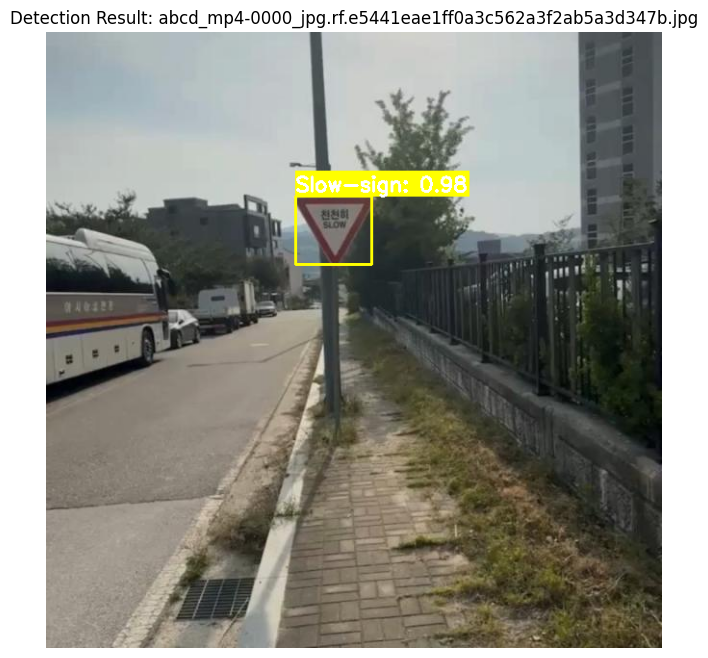

Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels


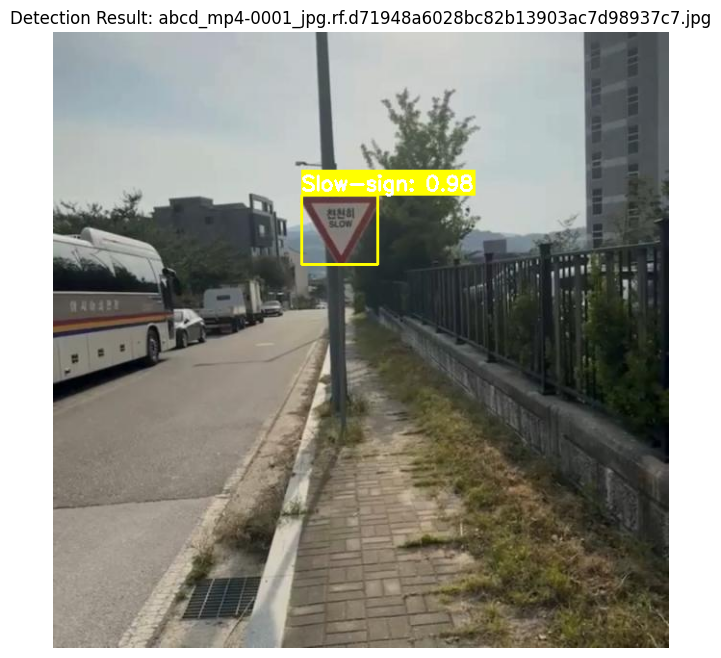

Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels


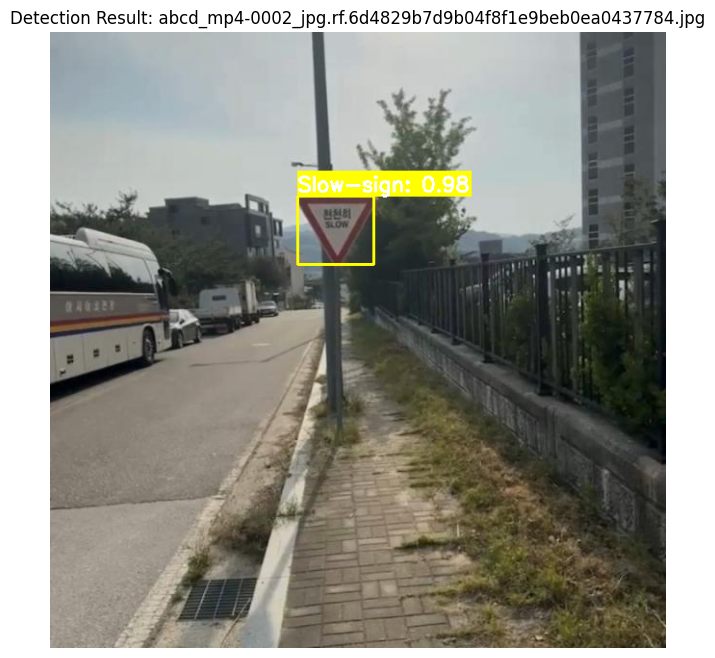

Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels


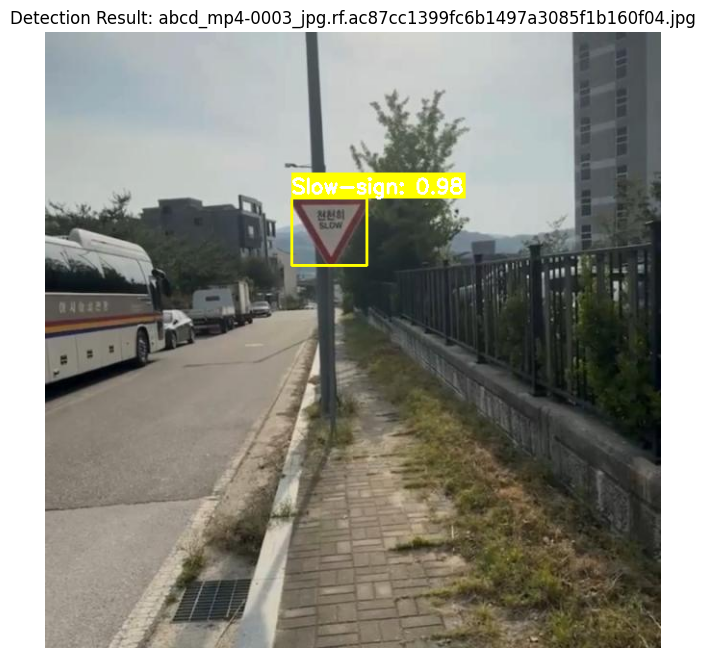

Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels


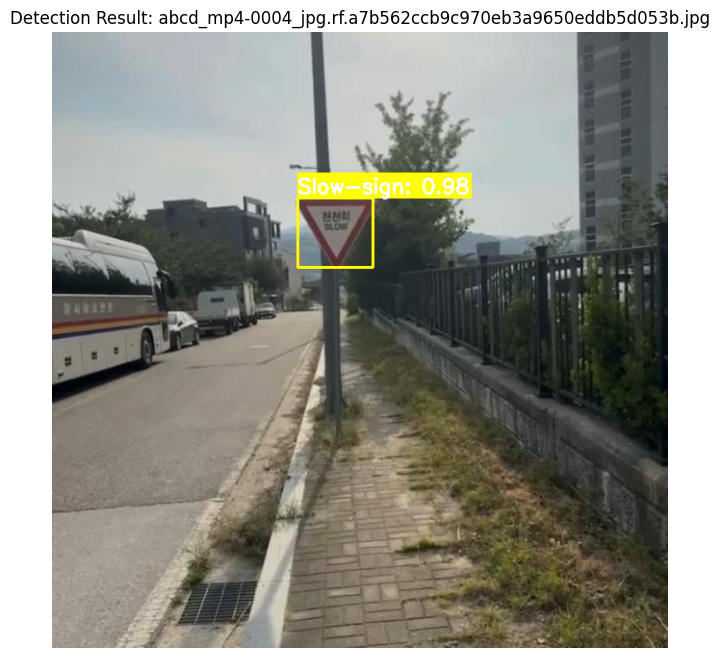

In [ ]:
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 바운딩 박스 시각화
    bbox_img = draw_bbox_results(img_path, result)

    # 결과 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(bbox_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()


In [ ]:
import shutil
from google.colab import files

# 1. zip 파일로 압축 (기존 zip 파일이 있다면 덮어씌움)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 2. 다운로드 링크 제공
files.download('/content/runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#동영상 만들기
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# draw_enhanced_results 함수 정의 (최소한의 기능으로)
def draw_enhanced_results(img_path, results):
    image = cv2.imread(img_path)
    for r in results:
        for box in r.boxes:
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            label = f'{model.names[cls]} {conf:.2f}'
            cv2.rectangle(image, tuple(xyxy[:2]), tuple(xyxy[2:]), (0, 255, 0), 2)
            cv2.putText(image, label, tuple(xyxy[:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Matplotlib/np.array용

# 이미지 경로 설정
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:426]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB → BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 프레임 사이즈 통일
    bgr_img = cv2.resize(bgr_img, (640, 640))
    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 7
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)
out.release()

print(f"✅ 영상 저장 완료: {video_path}")

# 다운로드
files.download(video_path)



Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
426 labels saved to /content/runs/detect/test_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import os
from google.colab import files

# 모델 불러오기
model = YOLO('/content/dataset/train/yolov8_label_custom14/weights/best.pt')

# 동영상 경로 확인
video_path = '/content/교통표지판.mp4'
if not os.path.exists(video_path):
    raise FileNotFoundError(f"❌ 동영상 파일이 존재하지 않습니다: {video_path}")

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError(f"❌ 동영상을 열 수 없습니다: {video_path}")

# 비디오 설정
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = '/content/detection_result_video.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

frame_count = 0  # 몇 개 프레임 처리했는지 확인

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.8, verbose=False)

    for r in results:
        for box in r.boxes:
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            label = f'{model.names[cls]} {conf:.2f}'
            cv2.rectangle(frame, tuple(xyxy[:2]), tuple(xyxy[2:]), (0, 255, 0), 2)
            cv2.putText(frame, label, (xyxy[0], max(xyxy[1] - 10, 0)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    out.write(frame)
    frame_count += 1

cap.release()
out.release()

# ✅ 처리된 프레임 없으면 오류 출력
if frame_count == 0:
    raise RuntimeError("❌ 영상에서 프레임을 읽지 못해 파일이 생성되지 않았습니다.")

print(f"✅ 객체 인식 영상 저장 완료: {output_path} (프레임 수: {frame_count})")
files.download(output_path)

✅ 객체 인식 영상 저장 완료: /content/detection_result_video.mp4 (프레임 수: 1962)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>